## Starlink Shell 5 3360

## Index
- [24 Hour](#24-hours)
- [Altitude (h)](#altitude-h)
- [Inclination (i)](#inclination-i)
- [AoE (e)](#aoe-e)
- [O x N](#number-of-orbits-o)
- [Phase-offset](#phase-offset-p)
- [HP region](#hp-region)
    - [O x N](#hp-number-of-orbits-o)
    - [Phase-offset](#hp-phase-offset-p)
    - [p vs o](#p-vs-o)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 7)
plt.rcParams.update({'font.size': 20})

def plot_h24(df):

    df['time_delta'] = df['time_delta'] *24
    x_data = df['time_delta']
    x_label_ticks = [h for h in range(0,25)]
    xlabel = 'Hours (h)'
    
    
    # Throughput
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Throughput (Gbps)')
    ax1.tick_params(axis='y')

    # line1 = ax1.plot(x_data, df['th_POP_GDP'], label='Population GDP TM', color='r', linewidth=3)
    line2 = ax1.plot(x_data, df['throughput_Gbps'], label='Throughput', color='r', linewidth=3)
    
    lines = line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)

    
    # Coverage
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_ylabel('Coverage metrics &\n# Disconnected GS')
    ax1.set_xlabel(xlabel)
    ax1.tick_params(axis='y')

    line1 = ax1.plot(x_data, df['GS_coverage_metric'],  label='Coverage metrics GS', color='lime', linewidth=4)
    line2 = ax1.plot(x_data, df['dead_GS_count'],       label='# Disconnected GS', linestyle='dashed', color='lime', linewidth=5)

    ax2 = ax1.twinx()
    ax2.tick_params(axis='y')
    ax2.set_ylabel("Coverage metrics &\n# Disconnected flights")
    line3 = ax2.plot(x_data, df['flight_coverage_metric'],  label='Coverage metrics flight',color='royalblue', linewidth=4)
    line4 = ax2.plot(x_data, df['dead_flight_count'],       label='# Disconnected flight', linestyle='dashed', color='royalblue', linewidth=5)
    
    lines = line1+line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)


    # Stretch
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median stretch")
    plt.plot(x_data, df['NS_sth'], label='N/S', color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_sth'], label='E/W', color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_sth'], label='NE/SW', color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_sth'], label='HG', color='Green', linewidth=3)
    plt.plot(x_data, df['LG_sth'], label='LG', color='Orange', linewidth=3)
    plt.legend()
    plt.show()


    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median hop count")
    plt.plot(x_data, df['NS_cnt'], label='N/S',       color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_cnt'], label='E/W',       color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_cnt'], label='NE/SW',   color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_cnt'], label='HG',        color='Green', linewidth=3)
    plt.plot(x_data, df['LG_cnt'], label='LG',        color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()
    fig.tight_layout()

    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total end-end selected routes (%)")
    
    line1 = ax1.plot(x_data, df['NS_selt'], label='N/S',color='black', linewidth=3)
    line2 = ax1.plot(x_data, df['EW_selt'], label='E/W', color='Red', linewidth=3)
    line3 = ax1.plot(x_data, df['NESW_selt'], label='NE/SW', color='Purple', linewidth=3)
    line4 = ax1.plot(x_data, df['HG_selt'], label='High geodesic', color='Green', linewidth=3)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Total end-end selected routes LG (%)")
    
    line5 = ax2.plot(x_data, df['LG_selt'], label='Low geodesic', color='Orange', linewidth=3)
    
    lines = line1+line2+line3+line4+line5
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    plt.show()


    # Total demand accommodated
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total demand accommodated (%)")

    ax1.plot(x_data, df['total_accommodated_flow'], label='Demand accommodated',color='black', linewidth=3)
    
    ax1.legend()
    plt.show()

def plot_h(df):

    x_data = df['S0_h_km']
    x_label_ticks = [h for h in range(300, 2000+1, 50)]
    xlabel = 'Altitude (h) km'
    
    # Throughput
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Throughput (Gbps)')
    ax1.tick_params(axis='y')

    # line1 = ax1.plot(x_data, df['th_POP_GDP'], label='Population GDP TM', color='r', linewidth=3)
    line2 = ax1.plot(x_data, df['throughput_Gbps'], label='Throughput', color='r', linewidth=3)
    
    lines = line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)

    
    # Coverage
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_ylabel('Coverage metrics &\n# Disconnected GS')
    ax1.set_xlabel(xlabel)
    ax1.tick_params(axis='y')

    line1 = ax1.plot(x_data, df['GS_coverage_metric'],  label='Coverage metrics GS', color='lime', linewidth=4)
    line2 = ax1.plot(x_data, df['dead_GS_count'],       label='# Disconnected GS', linestyle='dashed', color='lime', linewidth=5)

    ax2 = ax1.twinx()
    ax2.tick_params(axis='y')
    ax2.set_ylabel("Coverage metrics &\n# Disconnected flights")
    line3 = ax2.plot(x_data, df['flight_coverage_metric'],  label='Coverage metrics flight',color='royalblue', linewidth=4)
    line4 = ax2.plot(x_data, df['dead_flight_count'],       label='# Disconnected flight', linestyle='dashed', color='royalblue', linewidth=5)
    
    lines = line1+line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)


    # Stretch
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median stretch")
    plt.plot(x_data, df['NS_sth'], label='N/S', color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_sth'], label='E/W', color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_sth'], label='NE/SW', color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_sth'], label='HG', color='Green', linewidth=3)
    plt.plot(x_data, df['LG_sth'], label='LG', color='Orange', linewidth=3)
    plt.legend()
    plt.show()


    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median hop count")
    plt.plot(x_data, df['NS_cnt'], label='N/S',       color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_cnt'], label='E/W',       color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_cnt'], label='NE/SW',   color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_cnt'], label='HG',        color='Green', linewidth=3)
    plt.plot(x_data, df['LG_cnt'], label='LG',        color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()
    fig.tight_layout()

    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total end-end selected routes (%)")
    
    line1 = ax1.plot(x_data, df['NS_selt'], label='N/S',color='black', linewidth=3)
    line2 = ax1.plot(x_data, df['EW_selt'], label='E/W', color='Red', linewidth=3)
    line3 = ax1.plot(x_data, df['NESW_selt'], label='NE/SW', color='Purple', linewidth=3)
    line4 = ax1.plot(x_data, df['HG_selt'], label='High geodesic', color='Green', linewidth=3)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Total end-end selected routes LG (%)")
    
    line5 = ax2.plot(x_data, df['LG_selt'], label='Low geodesic', color='Orange', linewidth=3)
    
    lines = line1+line2+line3+line4+line5
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    plt.show()


    # Total demand accommodated
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total demand accommodated (%)")

    ax1.plot(x_data, df['total_accommodated_flow'], label='Demand accommodated',color='black', linewidth=3)
    
    ax1.legend()
    plt.show()

def plot_e(df):

    x_data = df['S0_e']
    x_label_ticks = df['S0_e']
    xlabel = 'Angle of elevation (e)'
    
    # Throughput
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Throughput (Gbps)')
    ax1.tick_params(axis='y')

    # line1 = ax1.plot(x_data, df['th_POP_GDP'], label='Population GDP TM', color='r', linewidth=3)
    line2 = ax1.plot(x_data, df['throughput_Gbps'], label='Throughput', color='r', linewidth=3)
    
    lines = line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)

    
    # Coverage
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_ylabel('Coverage metrics &\n# Disconnected GS')
    ax1.set_xlabel(xlabel)
    ax1.tick_params(axis='y')

    line1 = ax1.plot(x_data, df['GS_coverage_metric'],  label='Coverage metrics GS', color='lime', linewidth=4)
    line2 = ax1.plot(x_data, df['dead_GS_count'],       label='# Disconnected GS', linestyle='dashed', color='lime', linewidth=5)

    ax2 = ax1.twinx()
    ax2.tick_params(axis='y')
    ax2.set_ylabel("Coverage metrics &\n# Disconnected flights")
    line3 = ax2.plot(x_data, df['flight_coverage_metric'],  label='Coverage metrics flight',color='royalblue', linewidth=4)
    line4 = ax2.plot(x_data, df['dead_flight_count'],       label='# Disconnected flight', linestyle='dashed', color='royalblue', linewidth=5)
    
    lines = line1+line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)



    # Stretch
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median stretch")
    plt.plot(x_data, df['NS_sth'], label='N/S', color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_sth'], label='E/W', color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_sth'], label='NE/SW', color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_sth'], label='HG', color='Green', linewidth=3)
    plt.plot(x_data, df['LG_sth'], label='LG', color='Orange', linewidth=3)
    plt.legend()
    plt.show()


    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median hop count")
    plt.plot(x_data, df['NS_cnt'], label='N/S',       color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_cnt'], label='E/W',       color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_cnt'], label='NE/SW',   color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_cnt'], label='HG',        color='Green', linewidth=3)
    plt.plot(x_data, df['LG_cnt'], label='LG',        color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()
    fig.tight_layout()

    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total end-end selected routes (%)")
    
    line1 = ax1.plot(x_data, df['NS_selt'], label='N/S',color='black', linewidth=3)
    line2 = ax1.plot(x_data, df['EW_selt'], label='E/W', color='Red', linewidth=3)
    line3 = ax1.plot(x_data, df['NESW_selt'], label='NE/SW', color='Purple', linewidth=3)
    line4 = ax1.plot(x_data, df['HG_selt'], label='High geodesic', color='Green', linewidth=3)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Total end-end selected routes LG (%)")
    
    line5 = ax2.plot(x_data, df['LG_selt'], label='Low geodesic', color='Orange', linewidth=3)
    
    lines = line1+line2+line3+line4+line5
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    plt.show()


    # Total demand accommodated
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total demand accommodated (%)")

    ax1.plot(x_data, df['total_accommodated_flow'], label='Demand accommodated',color='black', linewidth=3)
    
    ax1.legend()
    plt.show()

def plot_i(df):

    x_data = df['S0_i']
    x_label_ticks = [i for i in range(5, 175+1, 5)]
    xlabel = 'Inclination degree (i)'
    
    # Throughput
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Throughput (Gbps)')
    ax1.tick_params(axis='y')

    # line1 = ax1.plot(x_data, df['th_POP_GDP'], label='Population GDP TM', color='r', linewidth=3)
    line2 = ax1.plot(x_data, df['throughput_Gbps'], label='Throughput', color='r', linewidth=3)
    
    lines = line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)

    
    # Coverage
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_ylabel('Coverage metrics &\n# Disconnected GS')
    ax1.set_xlabel(xlabel)
    ax1.tick_params(axis='y')

    line1 = ax1.plot(x_data, df['GS_coverage_metric'],  label='Coverage metrics GS', color='lime', linewidth=4)
    line2 = ax1.plot(x_data, df['dead_GS_count'],       label='# Disconnected GS', linestyle='dashed', color='lime', linewidth=5)

    ax2 = ax1.twinx()
    ax2.tick_params(axis='y')
    ax2.set_ylabel("Coverage metrics &\n# Disconnected flights")
    line3 = ax2.plot(x_data, df['flight_coverage_metric'],  label='Coverage metrics flight',color='royalblue', linewidth=4)
    line4 = ax2.plot(x_data, df['dead_flight_count'],       label='# Disconnected flight', linestyle='dashed', color='royalblue', linewidth=5)
    
    lines = line1+line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)



    # Stretch
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median stretch")
    plt.plot(x_data, df['NS_sth'], label='N/S', color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_sth'], label='E/W', color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_sth'], label='NE/SW', color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_sth'], label='HG', color='Green', linewidth=3)
    plt.plot(x_data, df['LG_sth'], label='LG', color='Orange', linewidth=3)
    plt.legend()
    plt.show()


    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median hop count")
    plt.plot(x_data, df['NS_cnt'], label='N/S',       color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_cnt'], label='E/W',       color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_cnt'], label='NE/SW',   color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_cnt'], label='HG',        color='Green', linewidth=3)
    plt.plot(x_data, df['LG_cnt'], label='LG',        color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()
    fig.tight_layout()

    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total end-end selected routes (%)")
    
    line1 = ax1.plot(x_data, df['NS_selt'], label='N/S',color='black', linewidth=3)
    line2 = ax1.plot(x_data, df['EW_selt'], label='E/W', color='Red', linewidth=3)
    line3 = ax1.plot(x_data, df['NESW_selt'], label='NE/SW', color='Purple', linewidth=3)
    line4 = ax1.plot(x_data, df['HG_selt'], label='High geodesic', color='Green', linewidth=3)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Total end-end selected routes LG (%)")
    
    line5 = ax2.plot(x_data, df['LG_selt'], label='Low geodesic', color='Orange', linewidth=3)
    
    lines = line1+line2+line3+line4+line5
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    plt.show()


    # Total demand accommodated
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total demand accommodated (%)")

    ax1.plot(x_data, df['total_accommodated_flow'], label='Demand accommodated',color='black', linewidth=3)
    
    ax1.legend()
    plt.show()

def plot_o(df):
    x_data = df['S0_o']
    x_label_ticks = df['S0_o']
    xlabel = '# orbits (o)'
    
    
    # Throughput
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Throughput (Gbps)')
    ax1.tick_params(axis='y')

    # line1 = ax1.plot(x_data, df['th_POP_GDP'], label='Population GDP TM', color='r', linewidth=3)
    line2 = ax1.plot(x_data, df['throughput_Gbps'], label='Throughput', color='r', linewidth=3)
    
    lines = line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)

    
    # Coverage
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_ylabel('Coverage metrics &\n# Disconnected GS')
    ax1.set_xlabel(xlabel)
    ax1.tick_params(axis='y')

    line1 = ax1.plot(x_data, df['GS_coverage_metric'],  label='Coverage metrics GS', color='lime', linewidth=4)
    line2 = ax1.plot(x_data, df['dead_GS_count'],       label='# Disconnected GS', linestyle='dashed', color='lime', linewidth=5)

    ax2 = ax1.twinx()
    ax2.tick_params(axis='y')
    ax2.set_ylabel("Coverage metrics &\n# Disconnected flights")
    line3 = ax2.plot(x_data, df['flight_coverage_metric'],  label='Coverage metrics flight',color='royalblue', linewidth=4)
    line4 = ax2.plot(x_data, df['dead_flight_count'],       label='# Disconnected flight', linestyle='dashed', color='royalblue', linewidth=5)
    
    lines = line1+line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)



    # Stretch
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median stretch")
    plt.plot(x_data, df['NS_sth'], label='N/S', color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_sth'], label='E/W', color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_sth'], label='NE/SW', color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_sth'], label='HG', color='Green', linewidth=3)
    plt.plot(x_data, df['LG_sth'], label='LG', color='Orange', linewidth=3)
    plt.legend()
    plt.show()


    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median hop count")
    plt.plot(x_data, df['NS_cnt'], label='N/S',       color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_cnt'], label='E/W',       color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_cnt'], label='NE/SW',   color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_cnt'], label='HG',        color='Green', linewidth=3)
    plt.plot(x_data, df['LG_cnt'], label='LG',        color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()
    fig.tight_layout()

    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total end-end selected routes (%)")
    
    line1 = ax1.plot(x_data, df['NS_selt'], label='N/S',color='black', linewidth=3)
    line2 = ax1.plot(x_data, df['EW_selt'], label='E/W', color='Red', linewidth=3)
    line3 = ax1.plot(x_data, df['NESW_selt'], label='NE/SW', color='Purple', linewidth=3)
    line4 = ax1.plot(x_data, df['HG_selt'], label='High geodesic', color='Green', linewidth=3)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Total end-end selected routes LG (%)")
    
    line5 = ax2.plot(x_data, df['LG_selt'], label='Low geodesic', color='Orange', linewidth=3)
    
    lines = line1+line2+line3+line4+line5
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    plt.show()


    # Total demand accommodated
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total demand accommodated (%)")

    ax1.plot(x_data, df['total_accommodated_flow'], label='Demand accommodated',color='black', linewidth=3)
    
    ax1.legend()
    plt.show()

def plot_p(df):
    x_data = df['S0_p']
    x_label_ticks = df['S0_p']
    xlabel = 'Phase-offset (p)'
    
    # Throughput
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Throughput (Gbps)')
    ax1.tick_params(axis='y')

    # line1 = ax1.plot(x_data, df['th_POP_GDP'], label='Population GDP TM', color='r', linewidth=3)
    line2 = ax1.plot(x_data, df['throughput_Gbps'], label='Throughput', color='r', linewidth=3)
    
    lines = line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)

    
    # Coverage
    fig, ax1 = plt.subplots()
    fig.tight_layout()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_ylabel('Coverage metrics &\n# Disconnected GS')
    ax1.set_xlabel(xlabel)
    ax1.tick_params(axis='y')

    line1 = ax1.plot(x_data, df['GS_coverage_metric'],  label='Coverage metrics GS', color='lime', linewidth=4)
    line2 = ax1.plot(x_data, df['dead_GS_count'],       label='# Disconnected GS', linestyle='dashed', color='lime', linewidth=5)

    ax2 = ax1.twinx()
    ax2.tick_params(axis='y')
    ax2.set_ylabel("Coverage metrics &\n# Disconnected flights")
    line3 = ax2.plot(x_data, df['flight_coverage_metric'],  label='Coverage metrics flight',color='royalblue', linewidth=4)
    line4 = ax2.plot(x_data, df['dead_flight_count'],       label='# Disconnected flight', linestyle='dashed', color='royalblue', linewidth=5)
    
    lines = line1+line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)



    # Stretch
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median stretch")
    plt.plot(x_data, df['NS_sth'], label='N/S', color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_sth'], label='E/W', color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_sth'], label='NE/SW', color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_sth'], label='HG', color='Green', linewidth=3)
    plt.plot(x_data, df['LG_sth'], label='LG', color='Orange', linewidth=3)
    plt.legend()
    plt.show()


    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(x_label_ticks, minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')

    plt.xlabel(xlabel)
    plt.ylabel("Median hop count")
    plt.plot(x_data, df['NS_cnt'], label='N/S',       color='Blue', linewidth=3)
    plt.plot(x_data, df['EW_cnt'], label='E/W',       color='Red', linewidth=3)
    plt.plot(x_data, df['NESW_cnt'], label='NE/SW',   color='Purple', linewidth=3)
    plt.plot(x_data, df['HG_cnt'], label='HG',        color='Green', linewidth=3)
    plt.plot(x_data, df['LG_cnt'], label='LG',        color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()
    fig.tight_layout()

    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total end-end selected routes (%)")
    
    line1 = ax1.plot(x_data, df['NS_selt'], label='N/S',color='black', linewidth=3)
    line2 = ax1.plot(x_data, df['EW_selt'], label='E/W', color='Red', linewidth=3)
    line3 = ax1.plot(x_data, df['NESW_selt'], label='NE/SW', color='Purple', linewidth=3)
    line4 = ax1.plot(x_data, df['HG_selt'], label='High geodesic', color='Green', linewidth=3)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Total end-end selected routes LG (%)")
    
    line5 = ax2.plot(x_data, df['LG_selt'], label='Low geodesic', color='Orange', linewidth=3)
    
    lines = line1+line2+line3+line4+line5
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    plt.show()


    # Total demand accommodated
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_label_ticks, minor=False)
    ax1.set_xticklabels(ax.get_xticks(), rotation = 40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Total demand accommodated (%)")

    ax1.plot(x_data, df['total_accommodated_flow'], label='Demand accommodated',color='black', linewidth=3)
    
    ax1.legend()
    plt.show()


def plot_o_vs_p(df):
    linewidth=1
    for o in sorted(df['S0_o'].unique()):
        _df = df[df['S0_o']==o]
        _df = _df.sort_values(by='S0_p')

        plt.plot(_df['S0_p'], _df['throughput_Gbps'], label=f'o={o}', linewidth=linewidth)
        linewidth+=1


    plt.grid(axis = 'x')
    plt.xlabel('Phase-offset (p)')
    plt.ylabel('Throughput (Gbps)')
    plt.legend(ncol=2)
    plt.tight_layout()
    plt.show()

#### 24 Hours

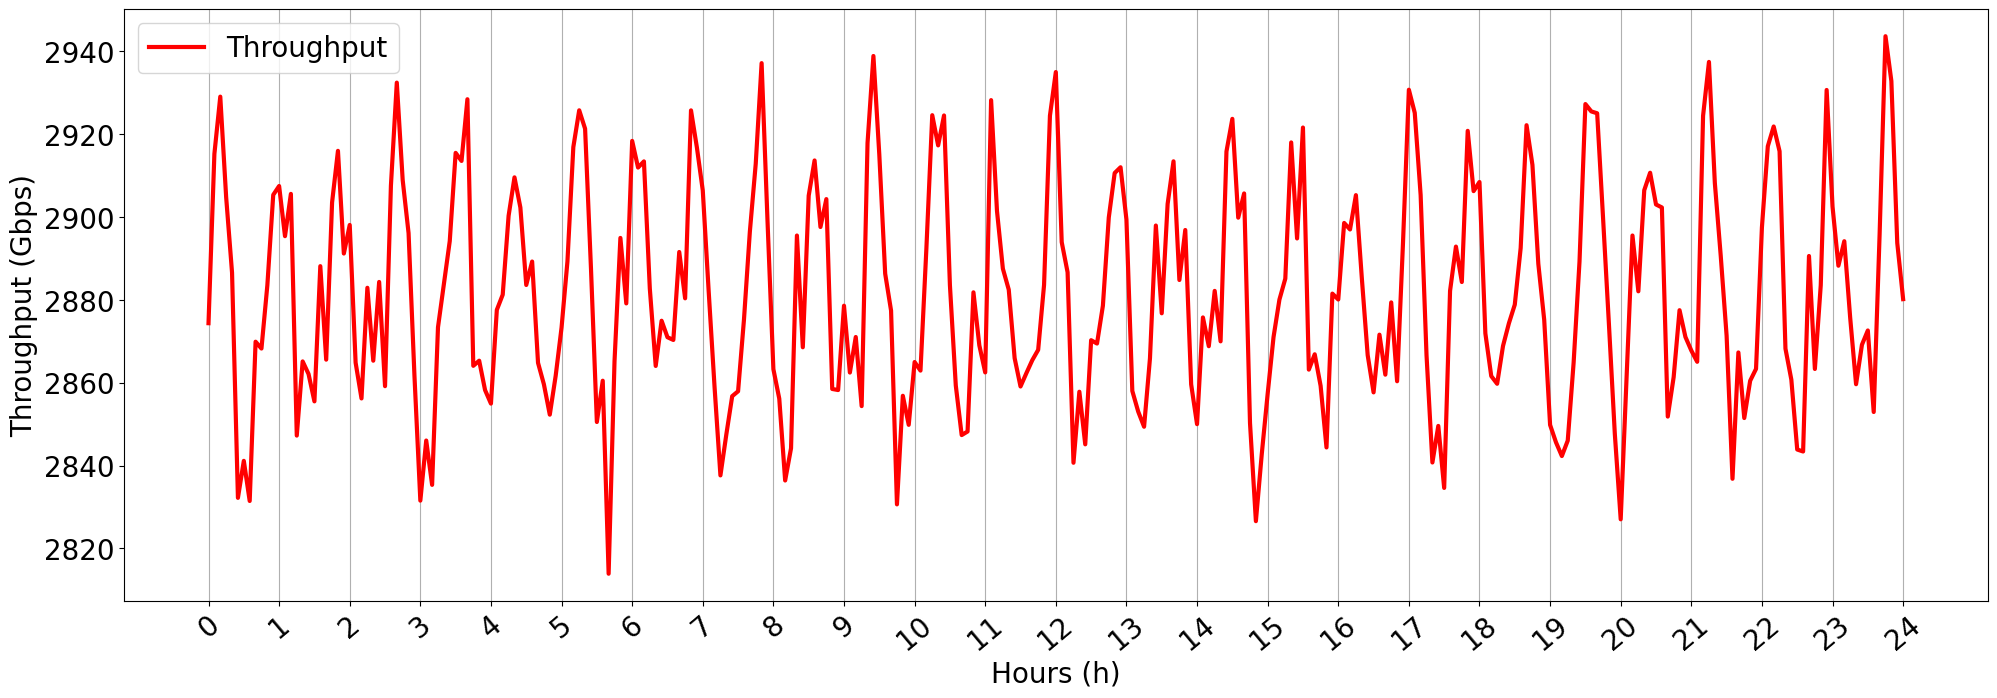

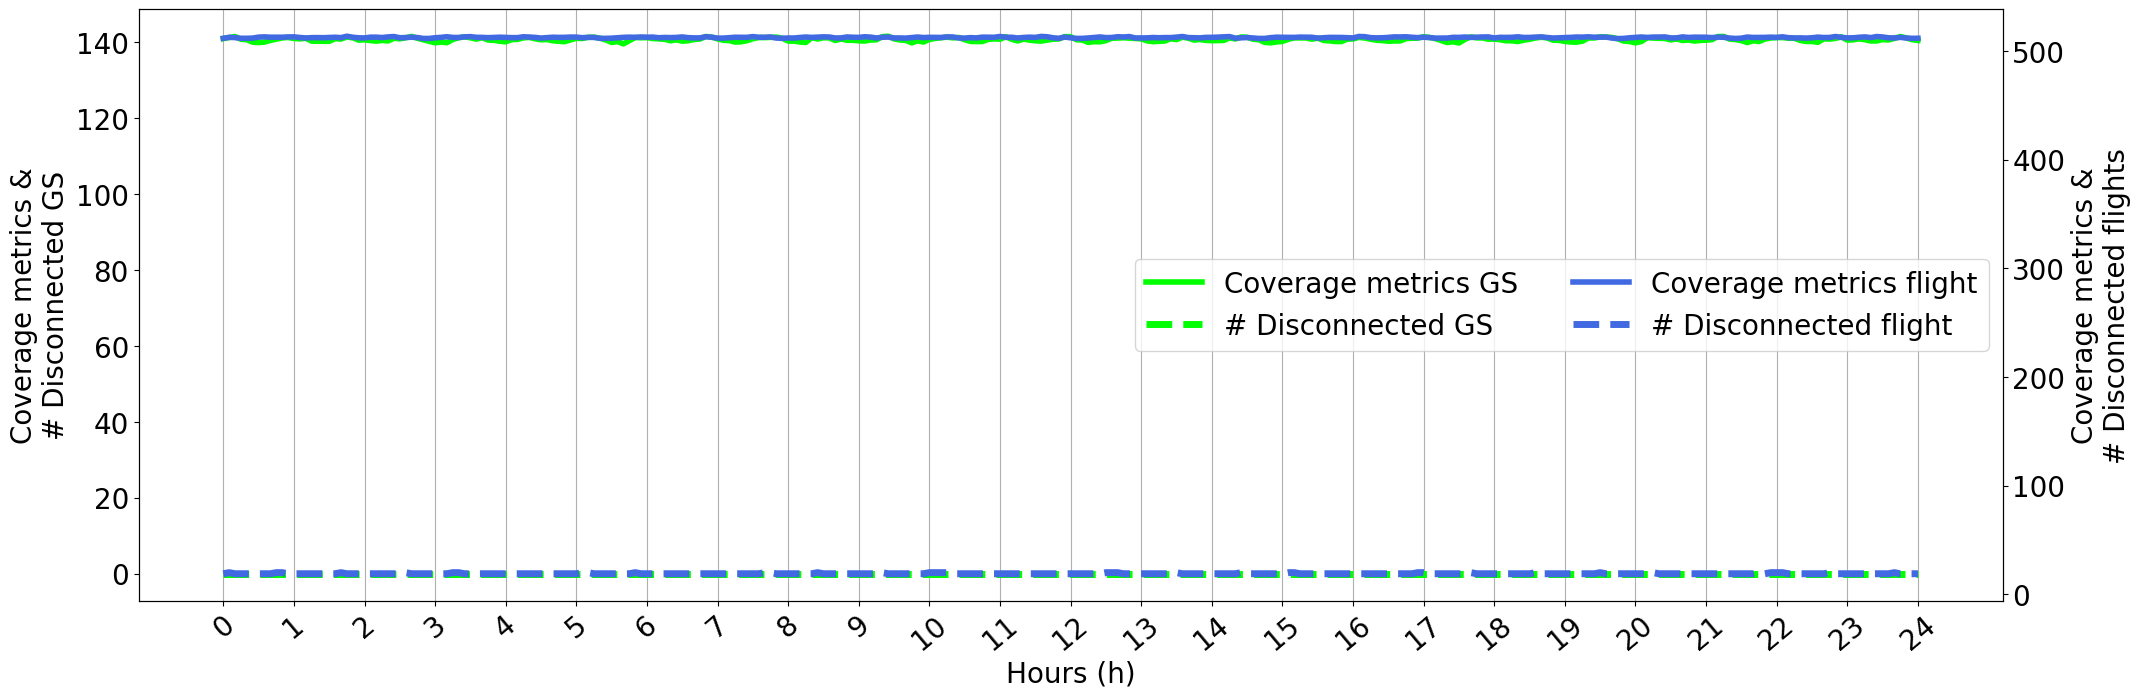

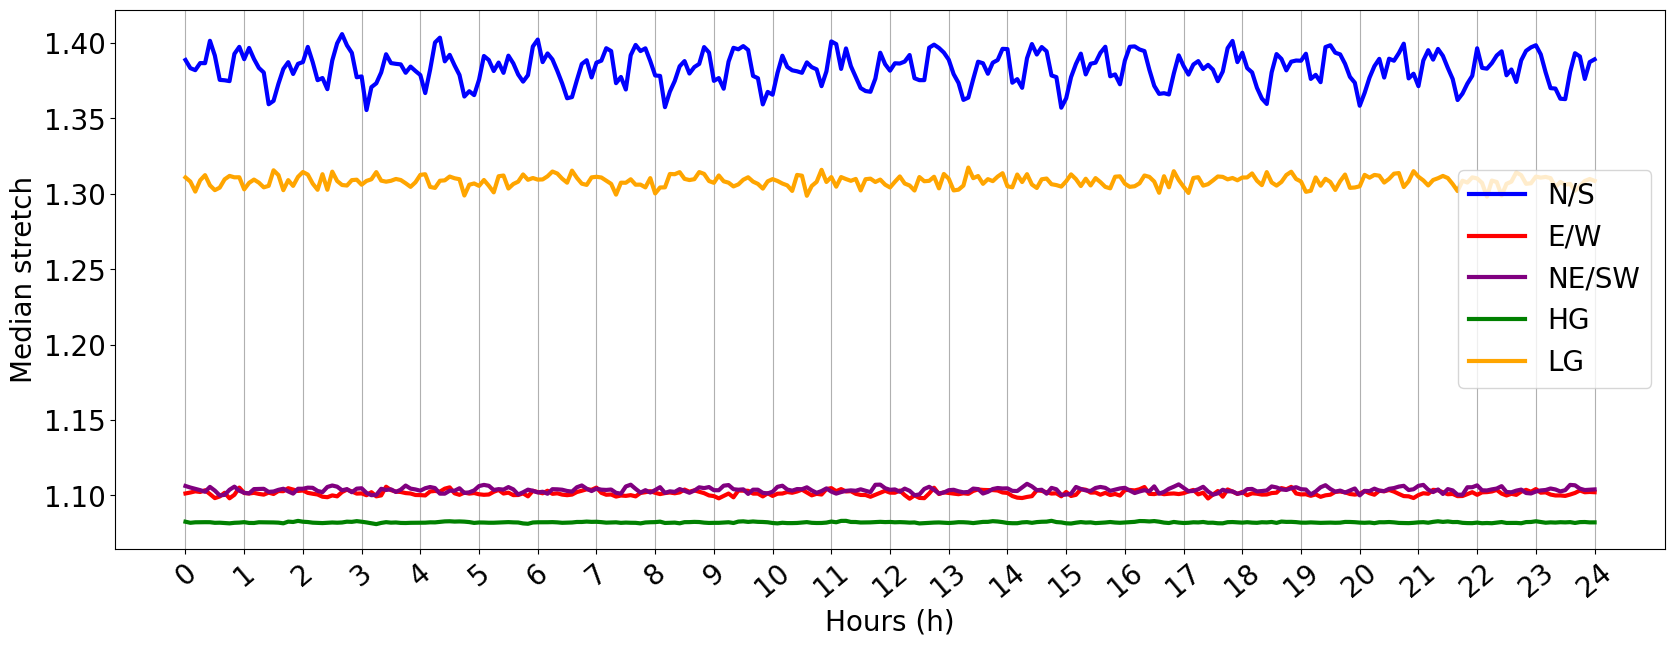

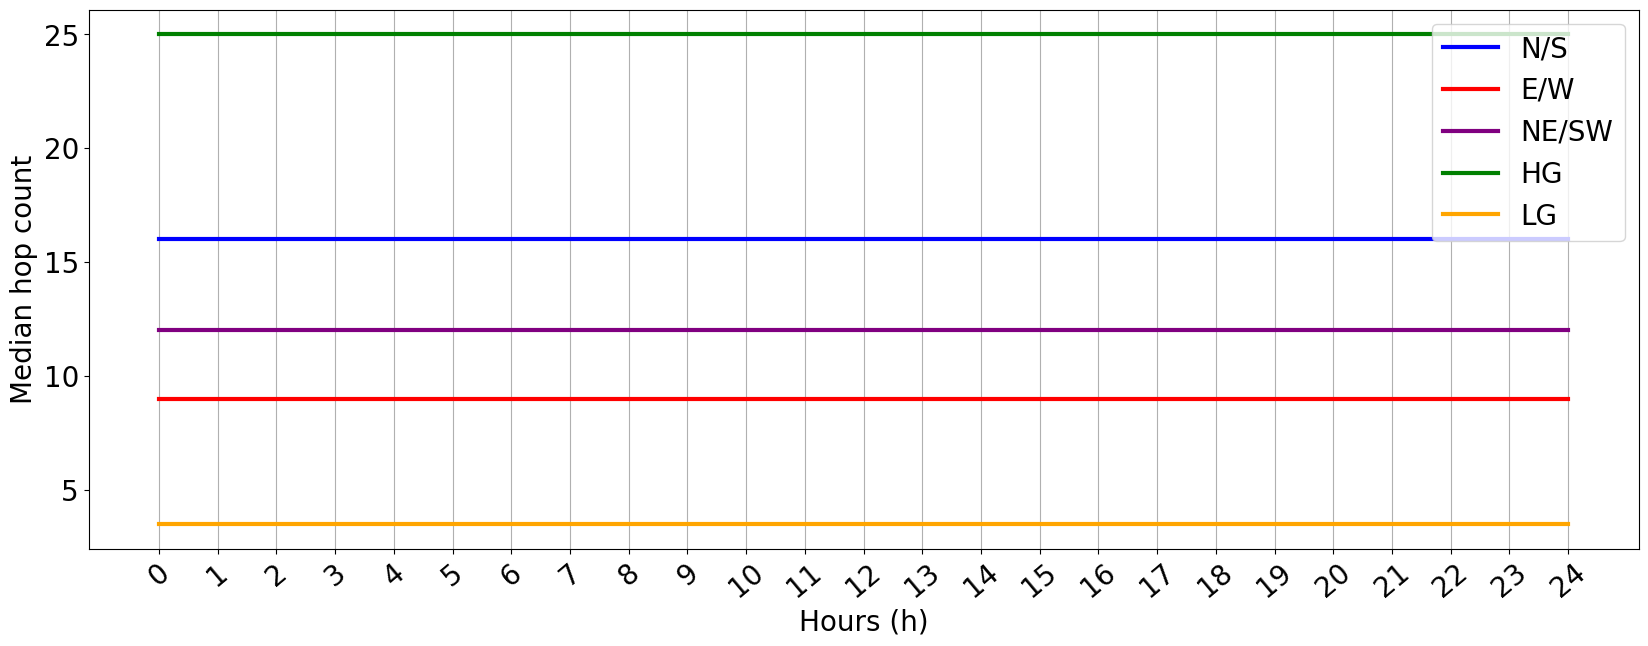

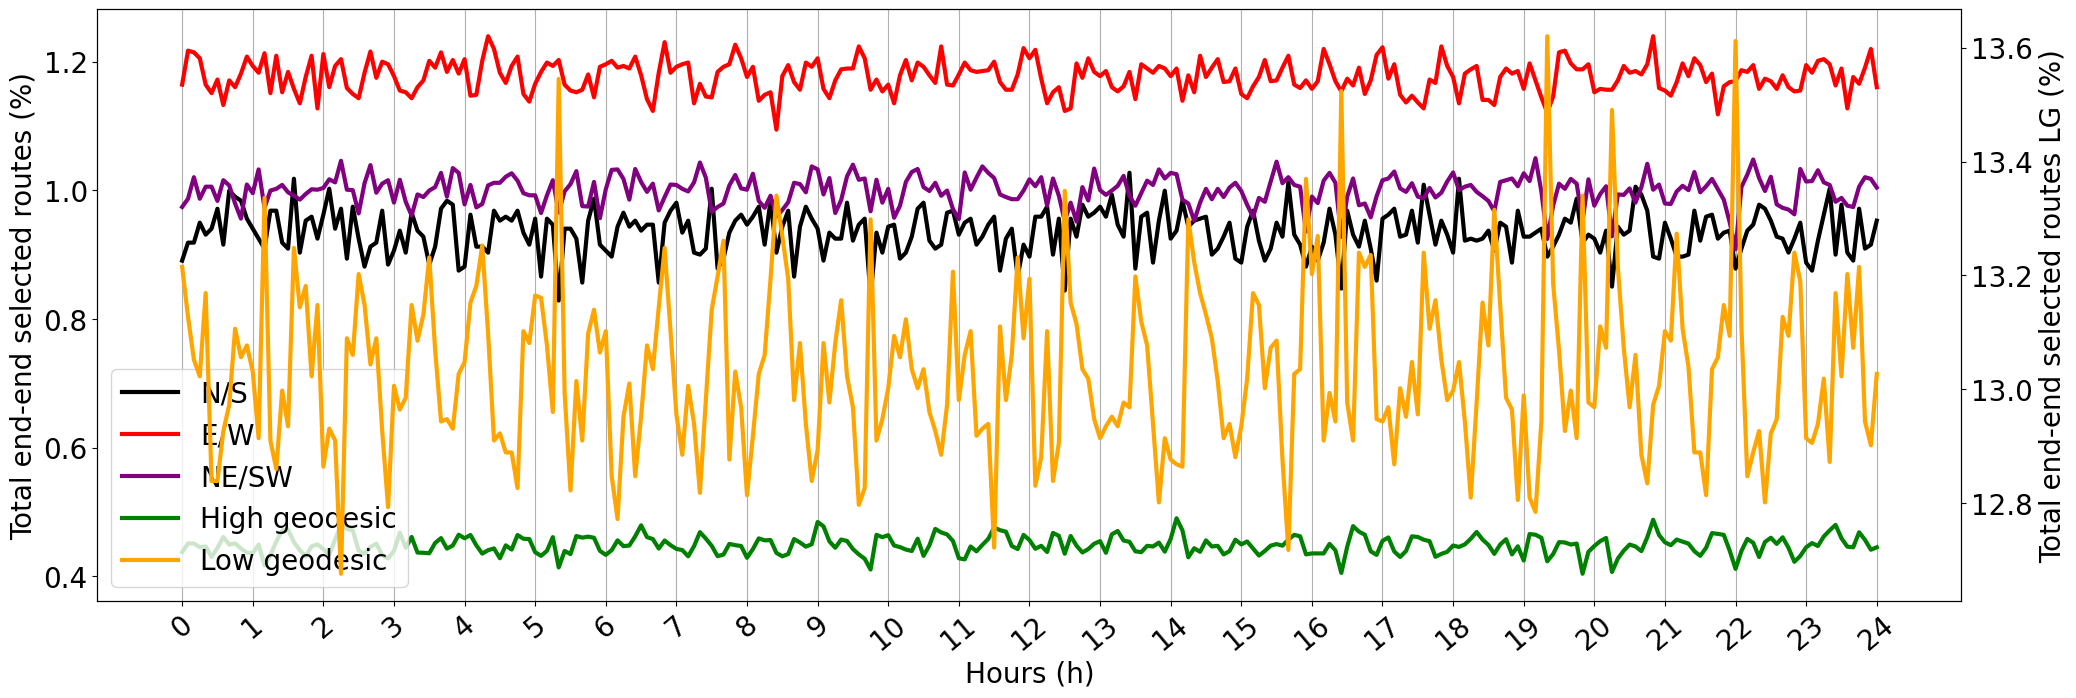

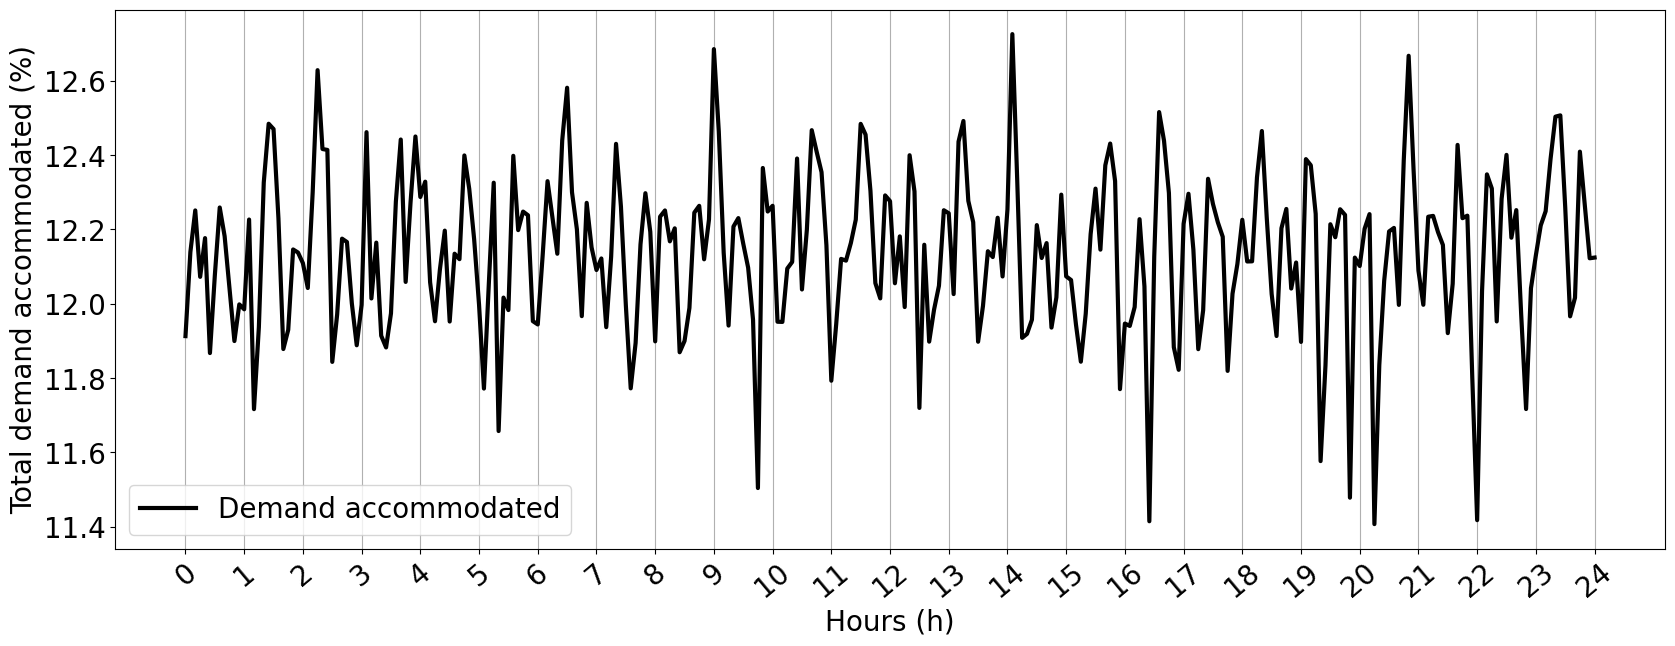

In [2]:
df = pd.read_csv('h_24.csv').sort_values(by='time_delta')
plot_h24(df)

#### Altitude (h)

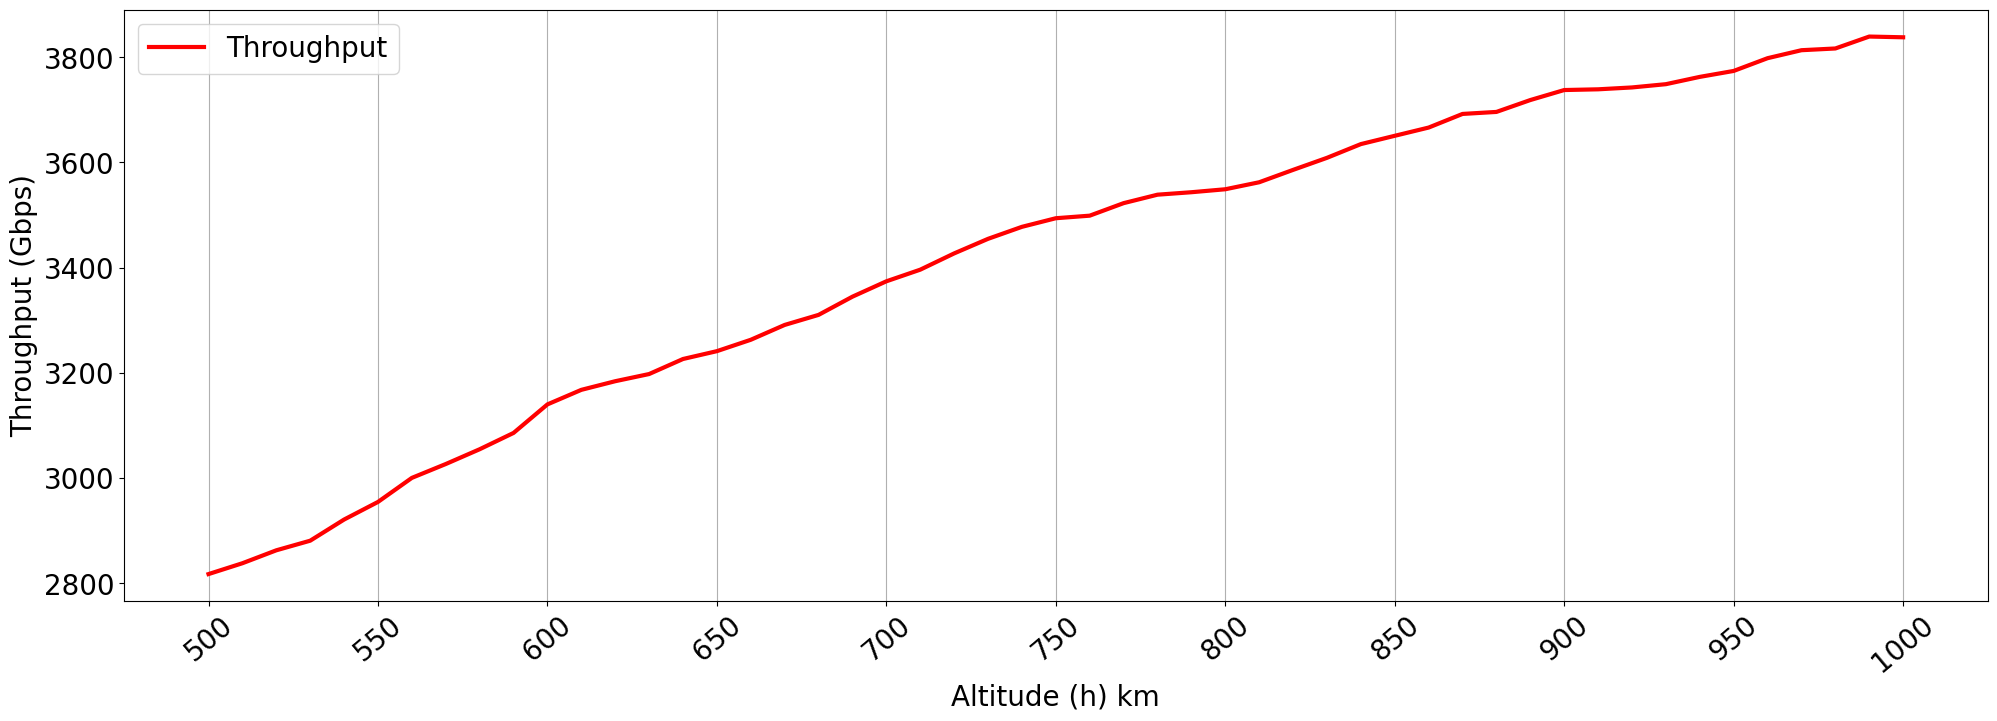

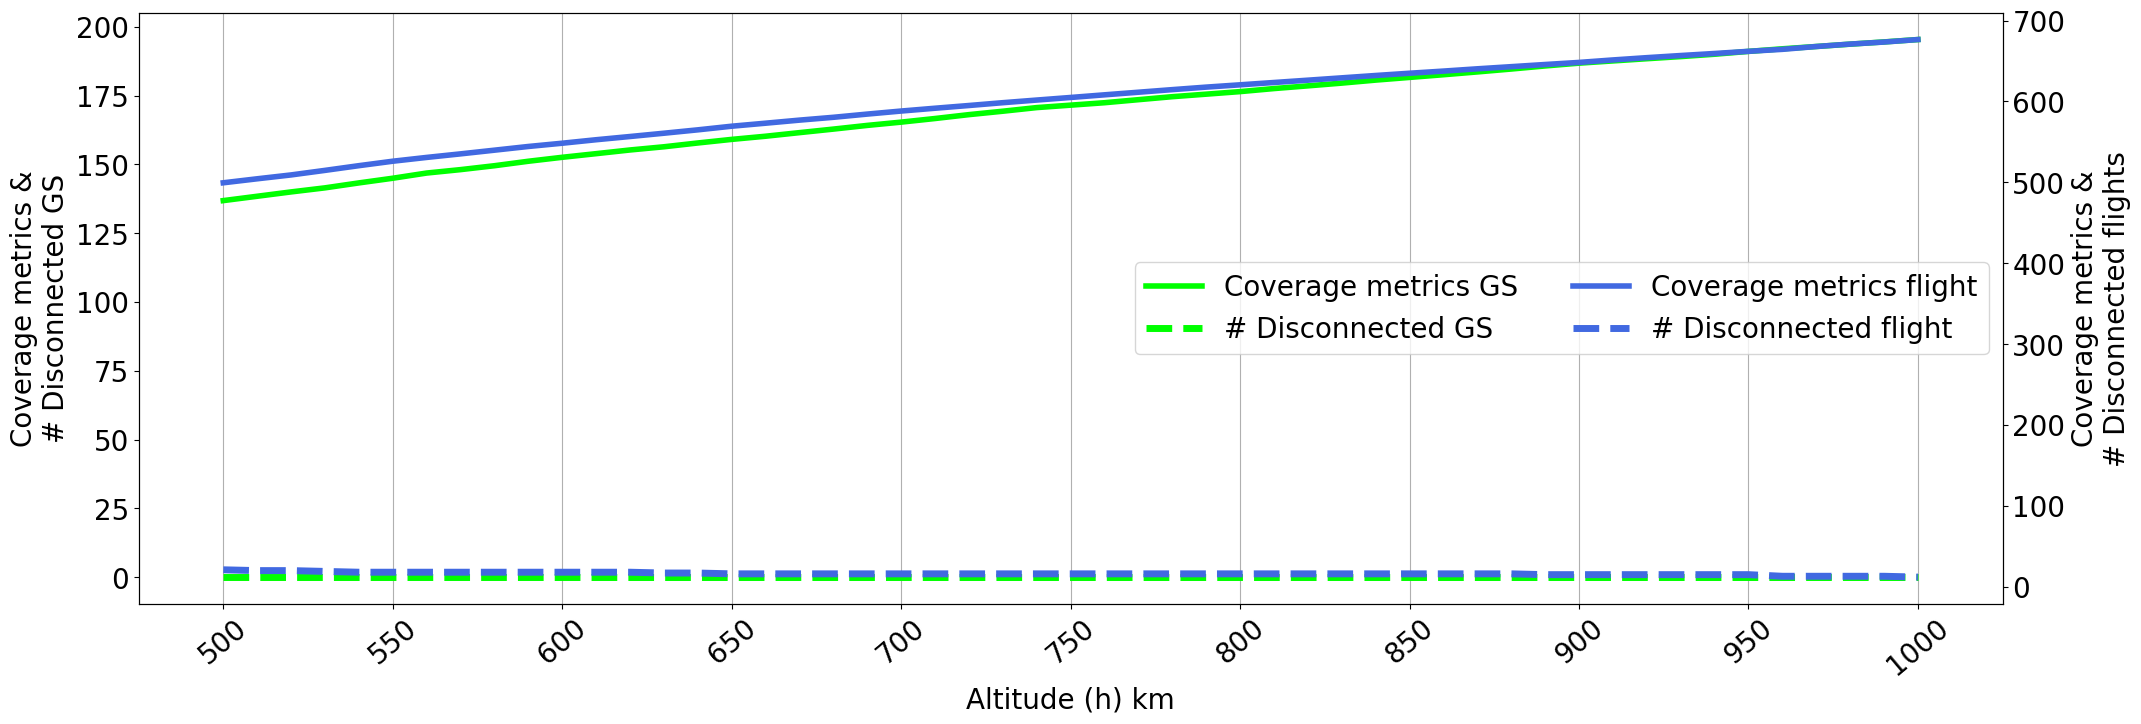

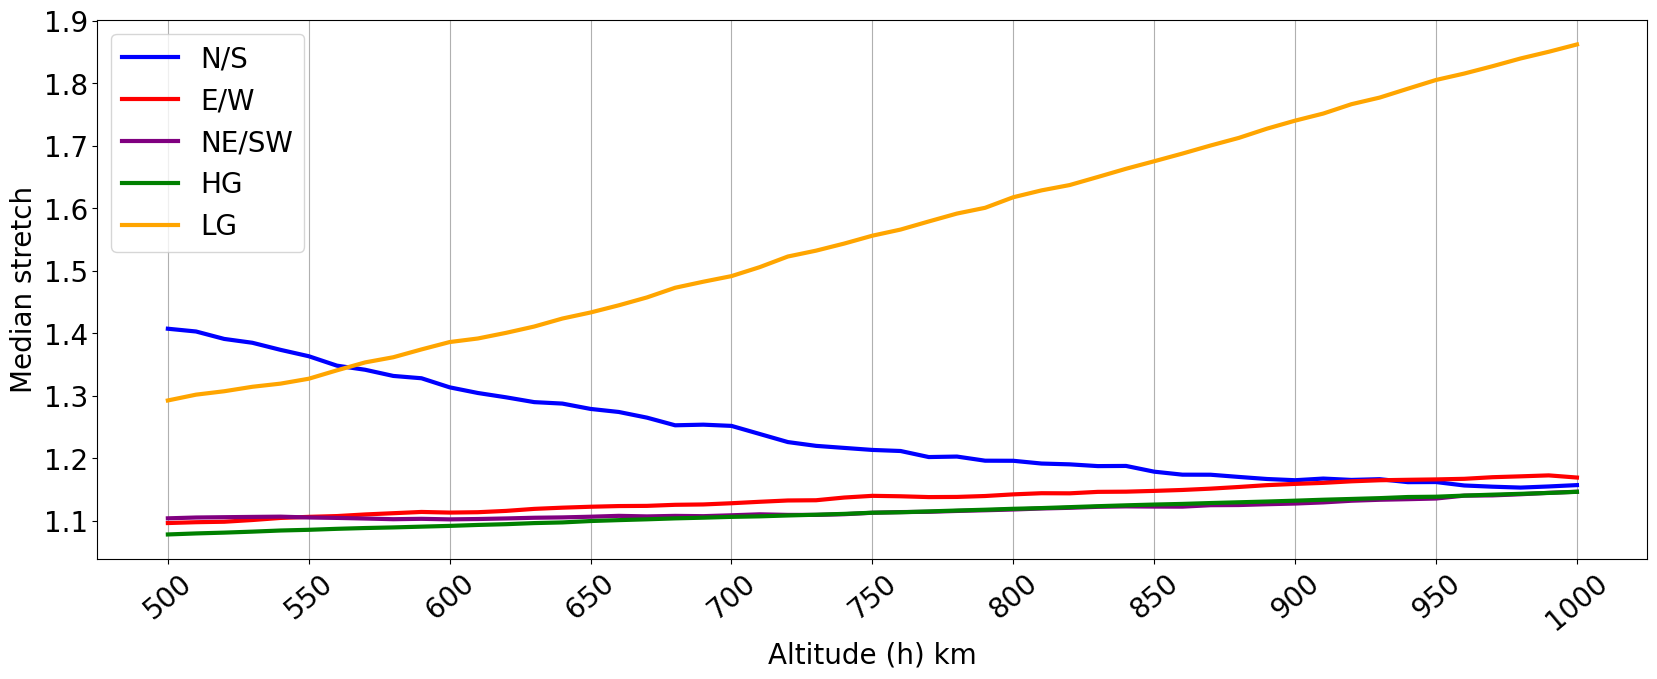

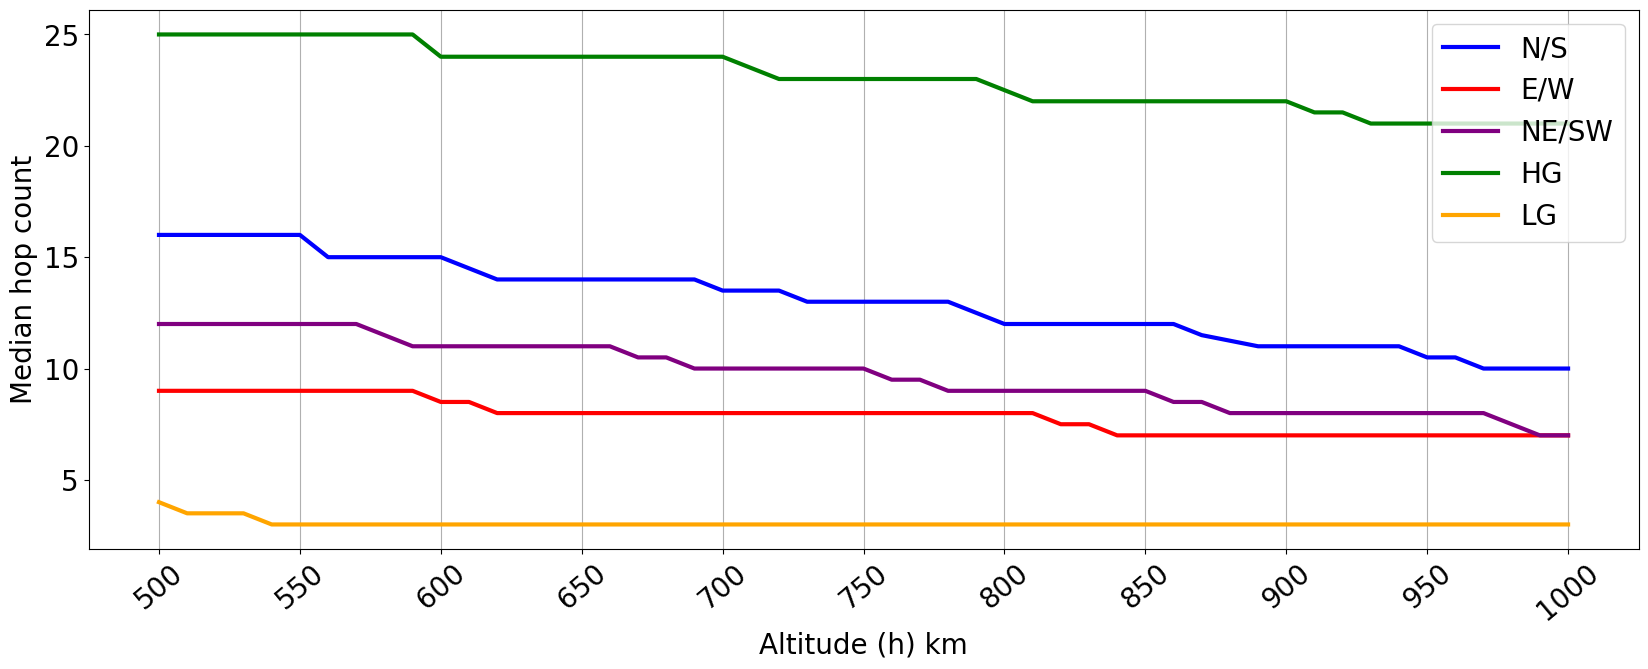

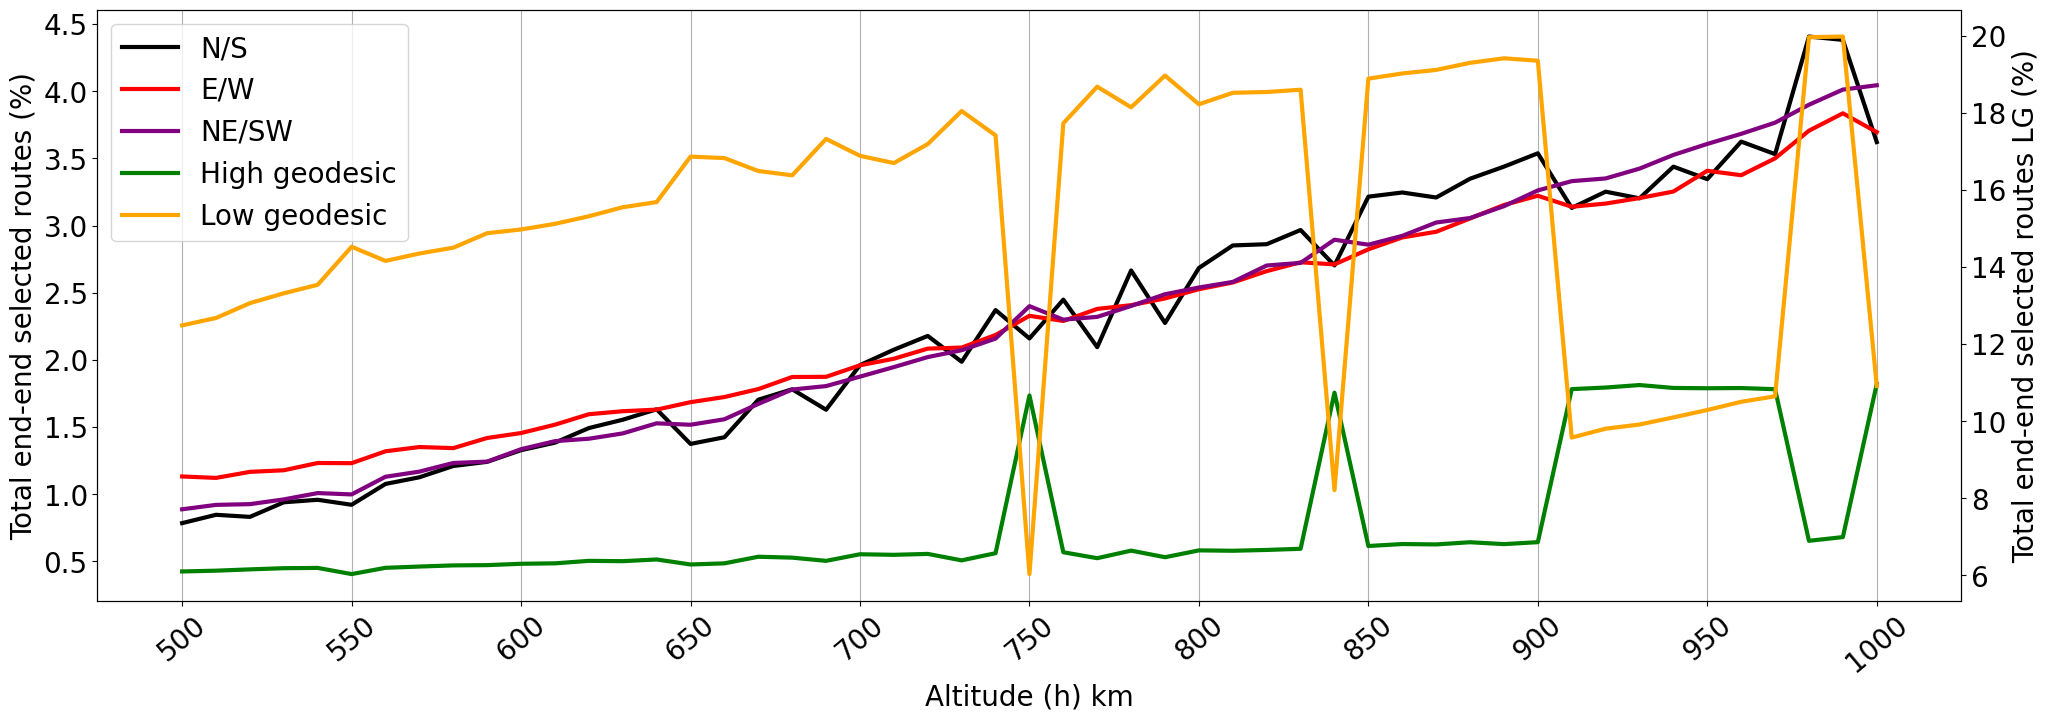

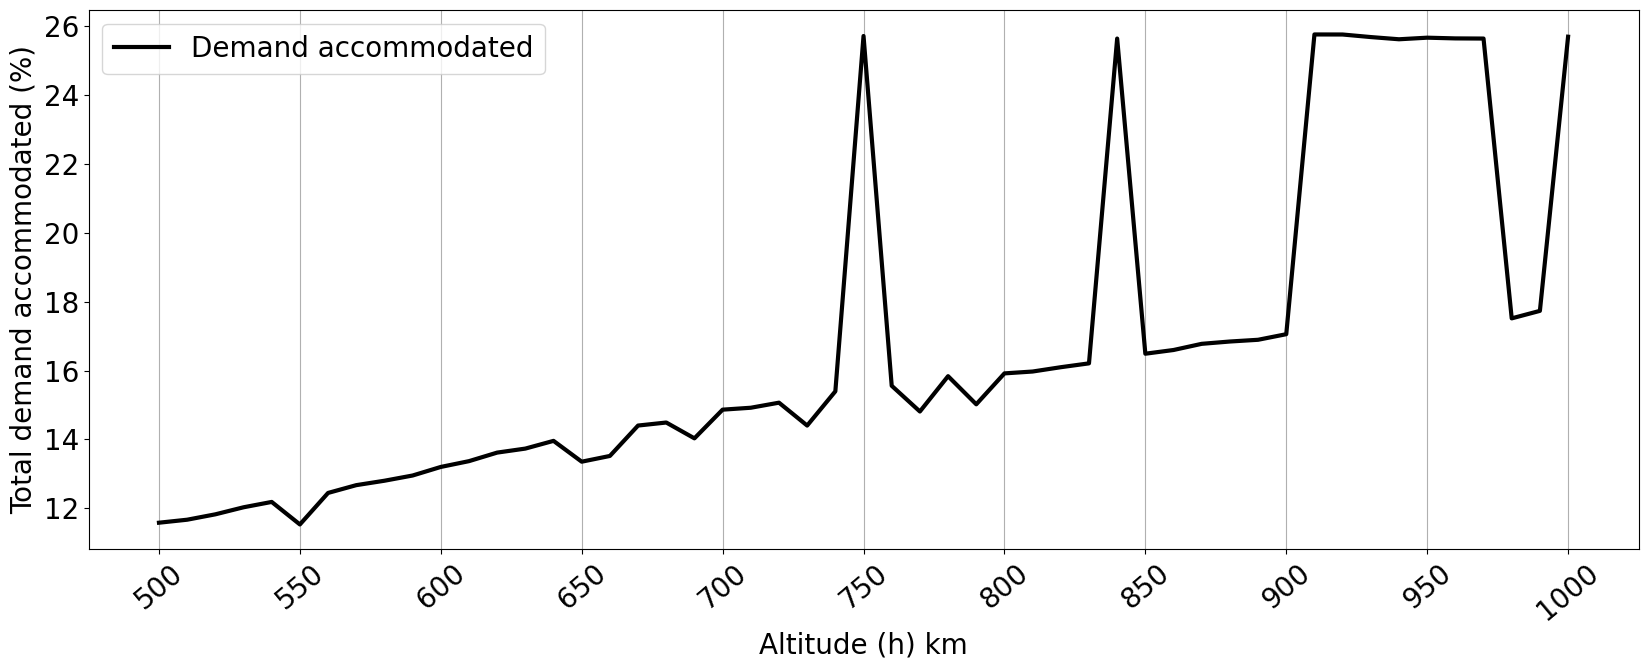

In [3]:
df = pd.read_csv('h_300_2000.csv').sort_values(by='S0_h_km')
plot_h(df)

#### AoE (e)

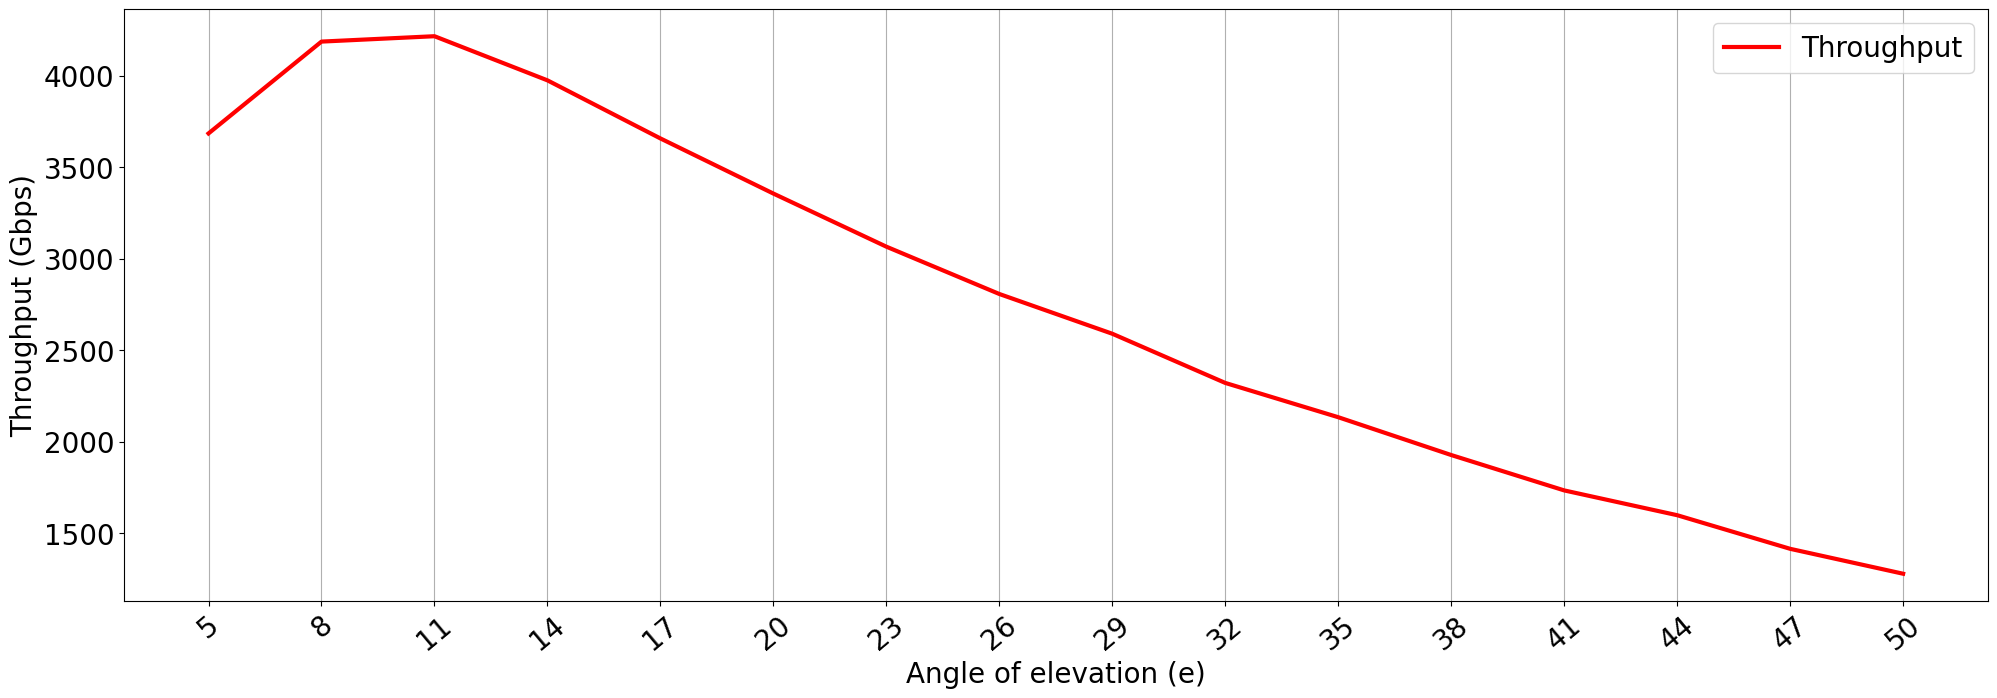

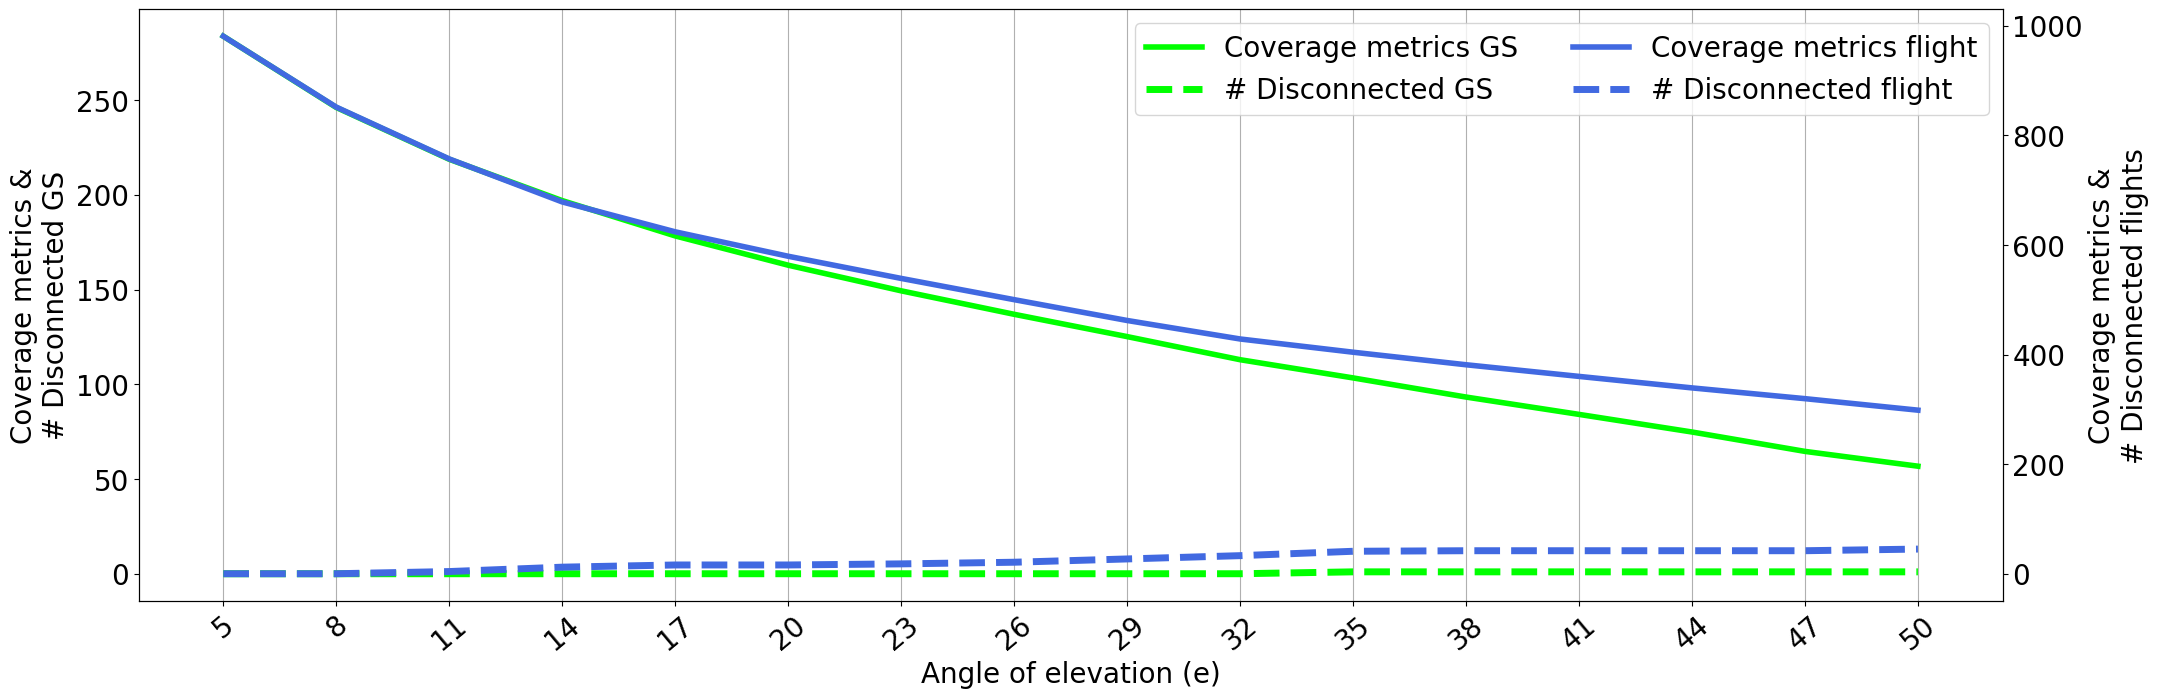

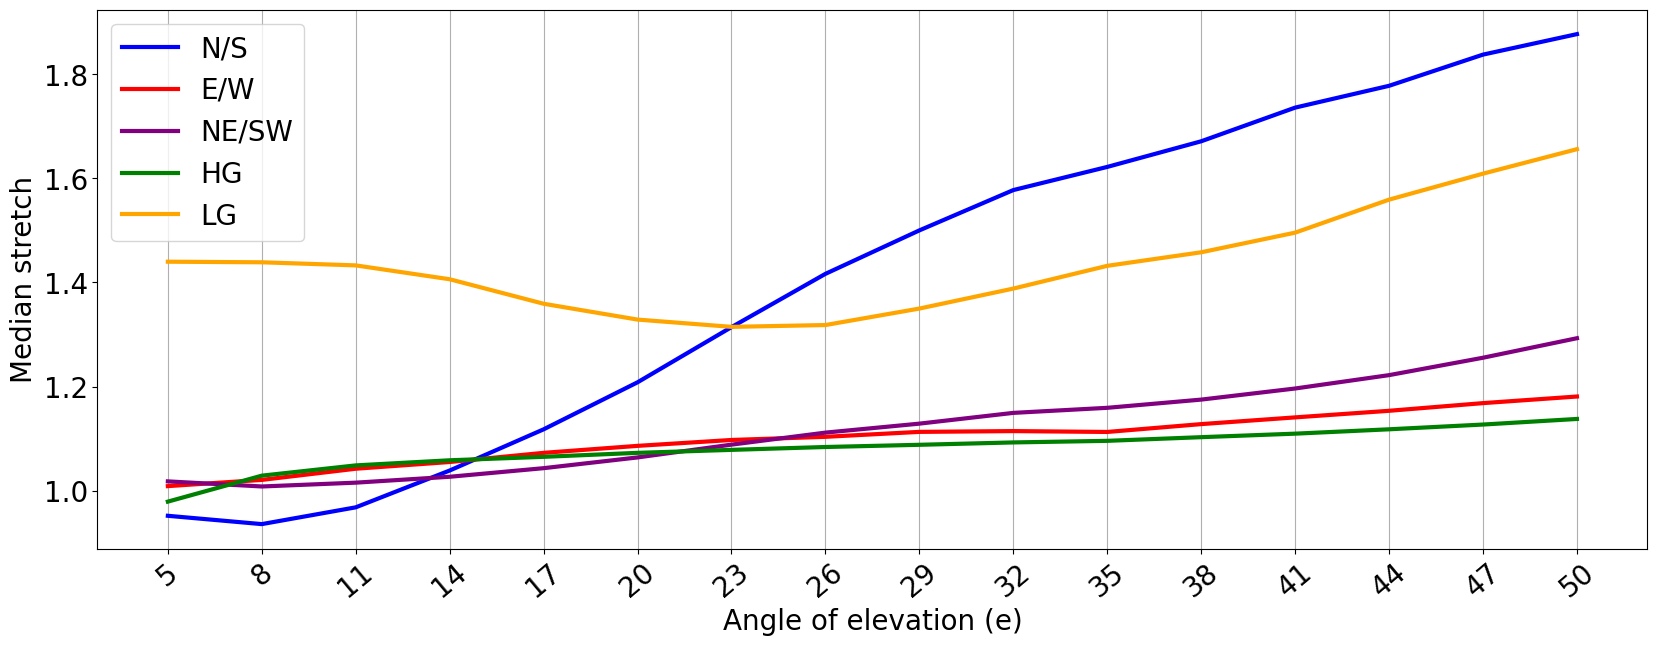

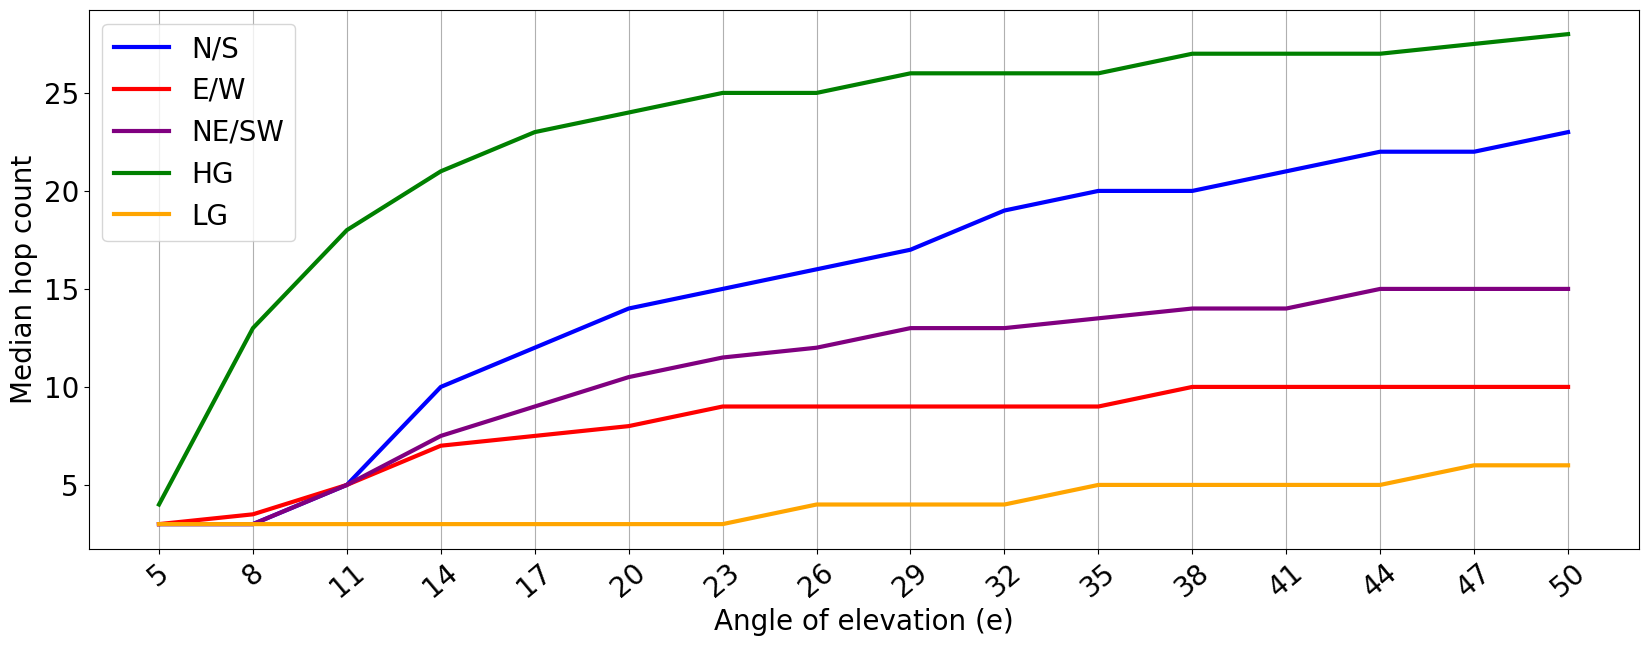

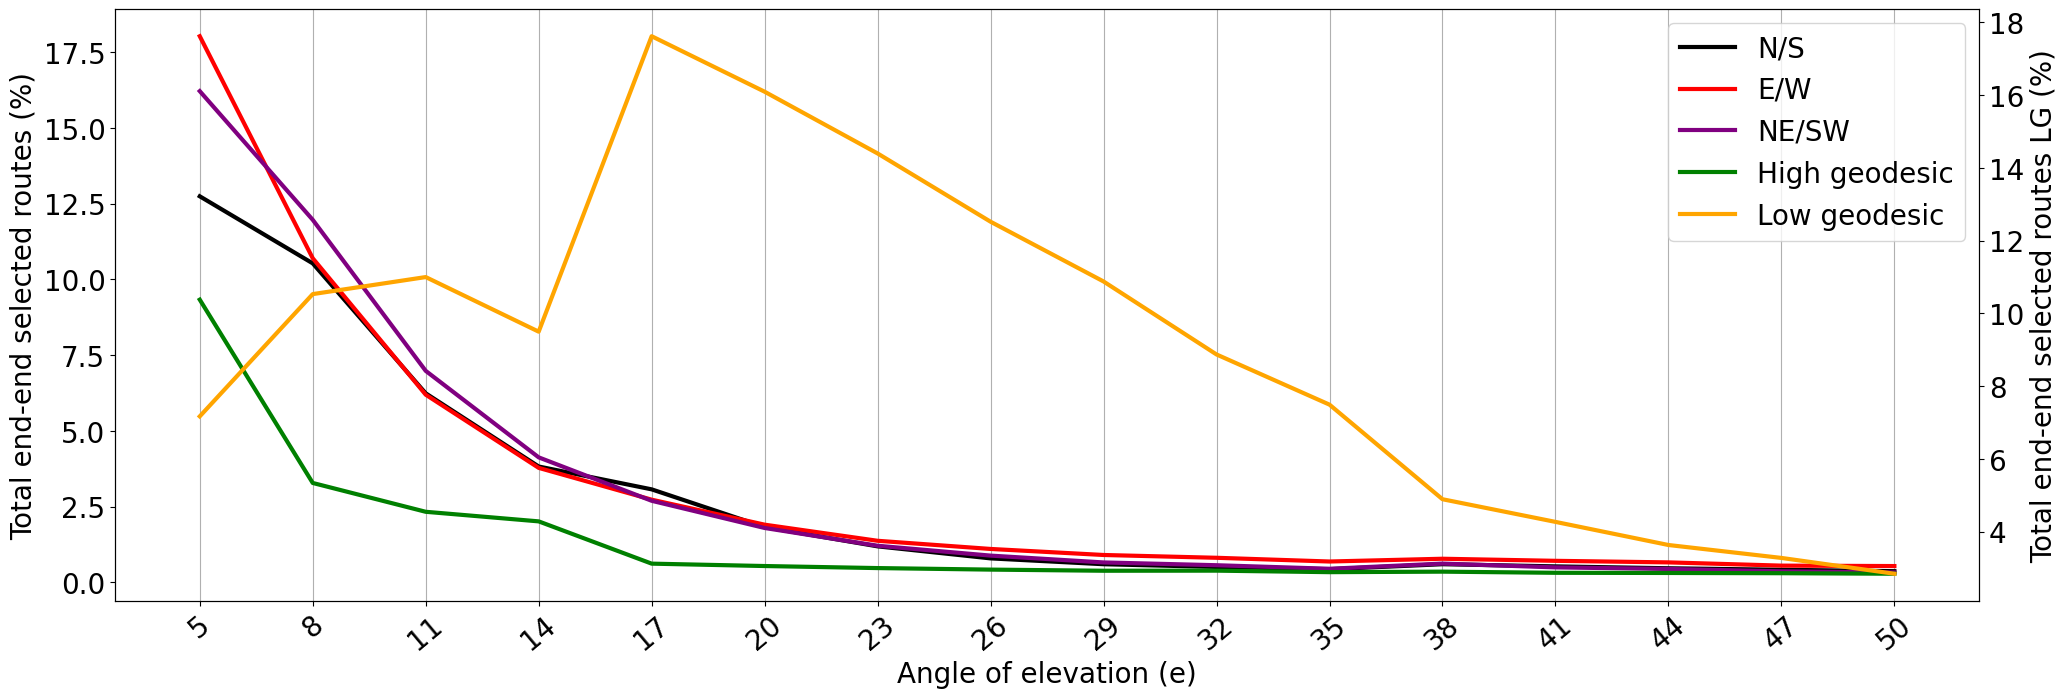

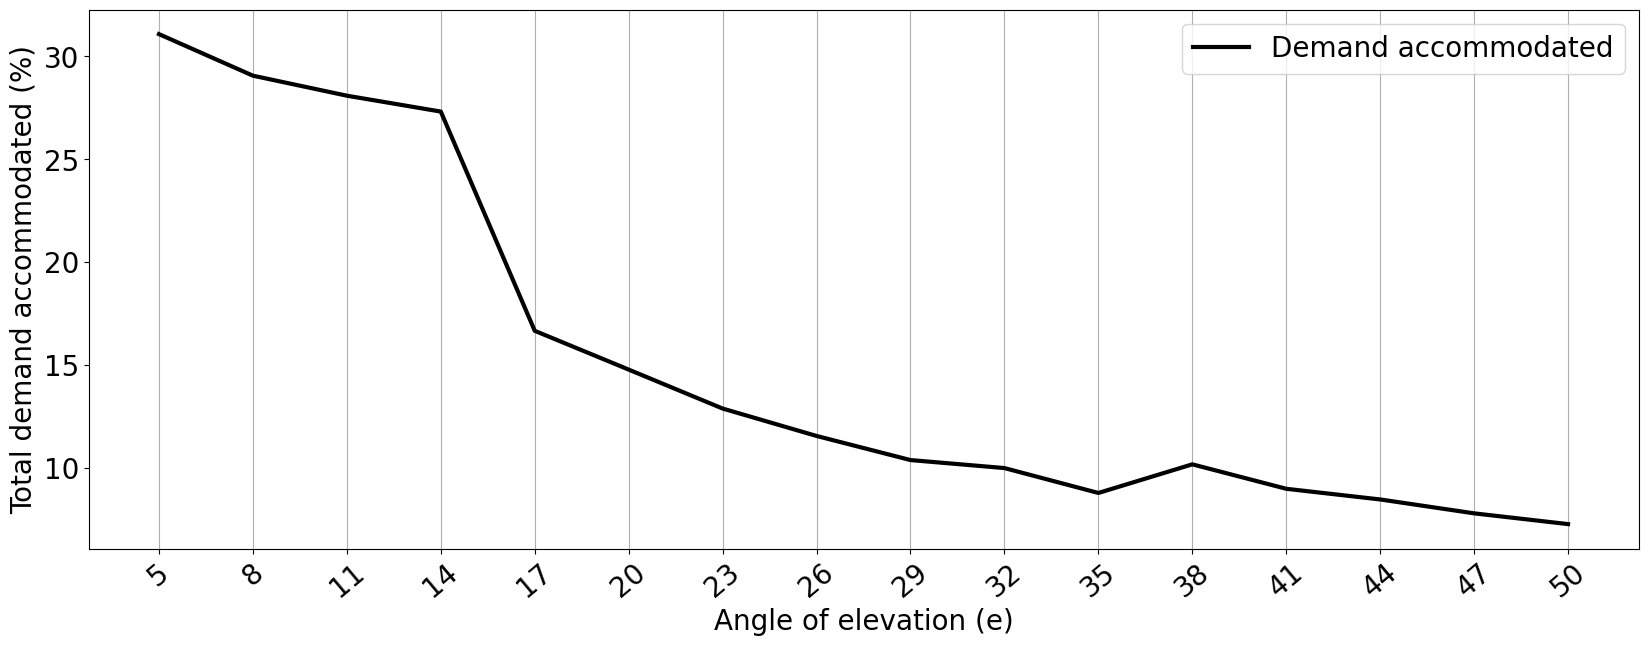

In [4]:
df = pd.read_csv('e_5_50.csv').sort_values(by='S0_e')
plot_e(df)

#### Inclination (i)

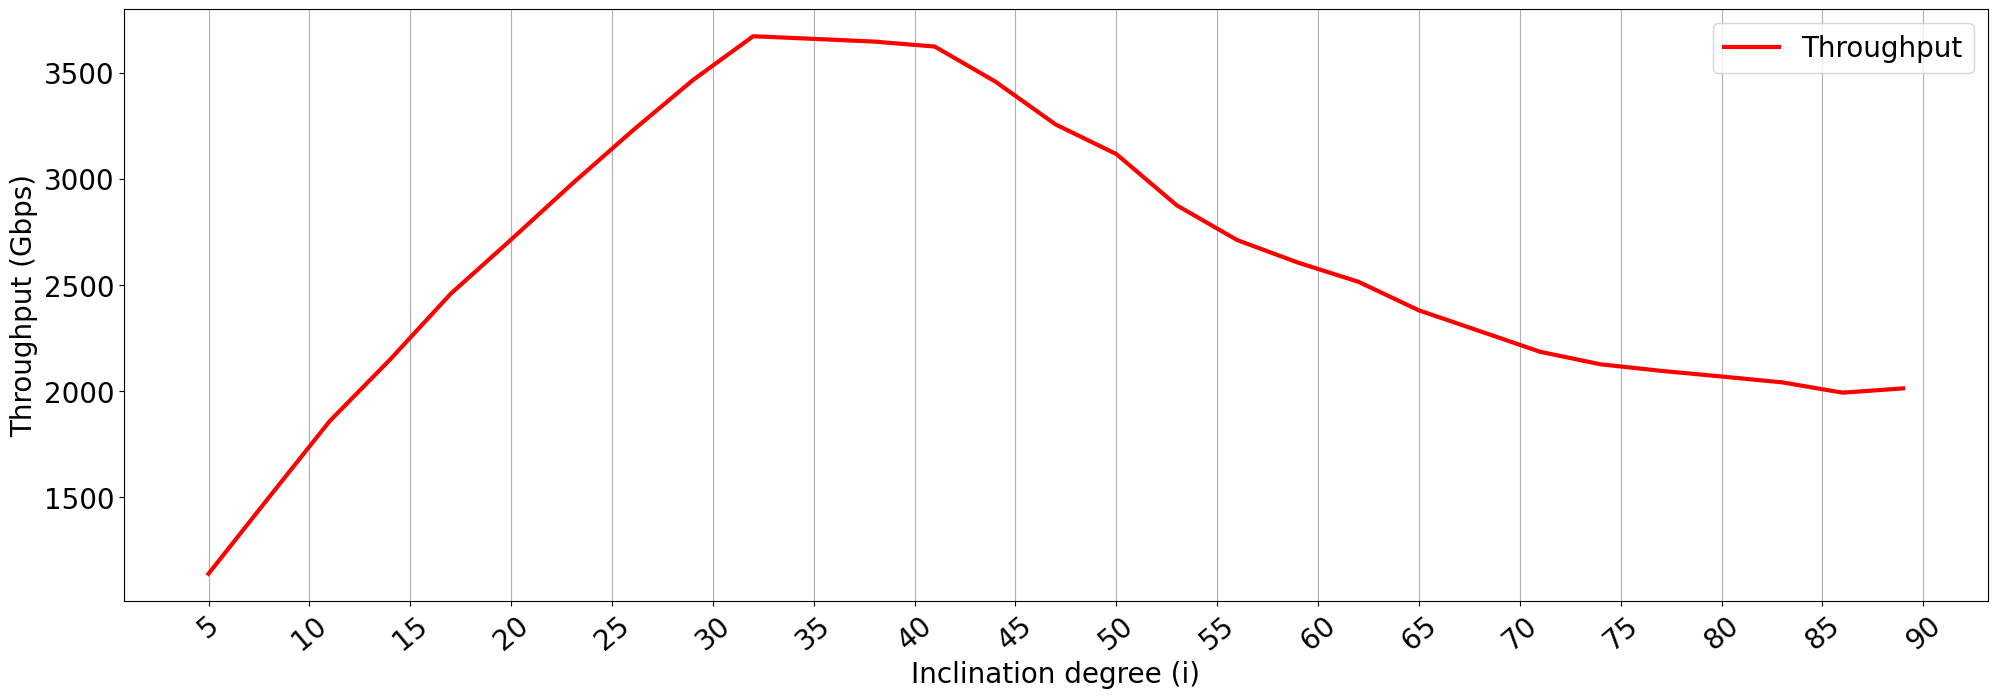

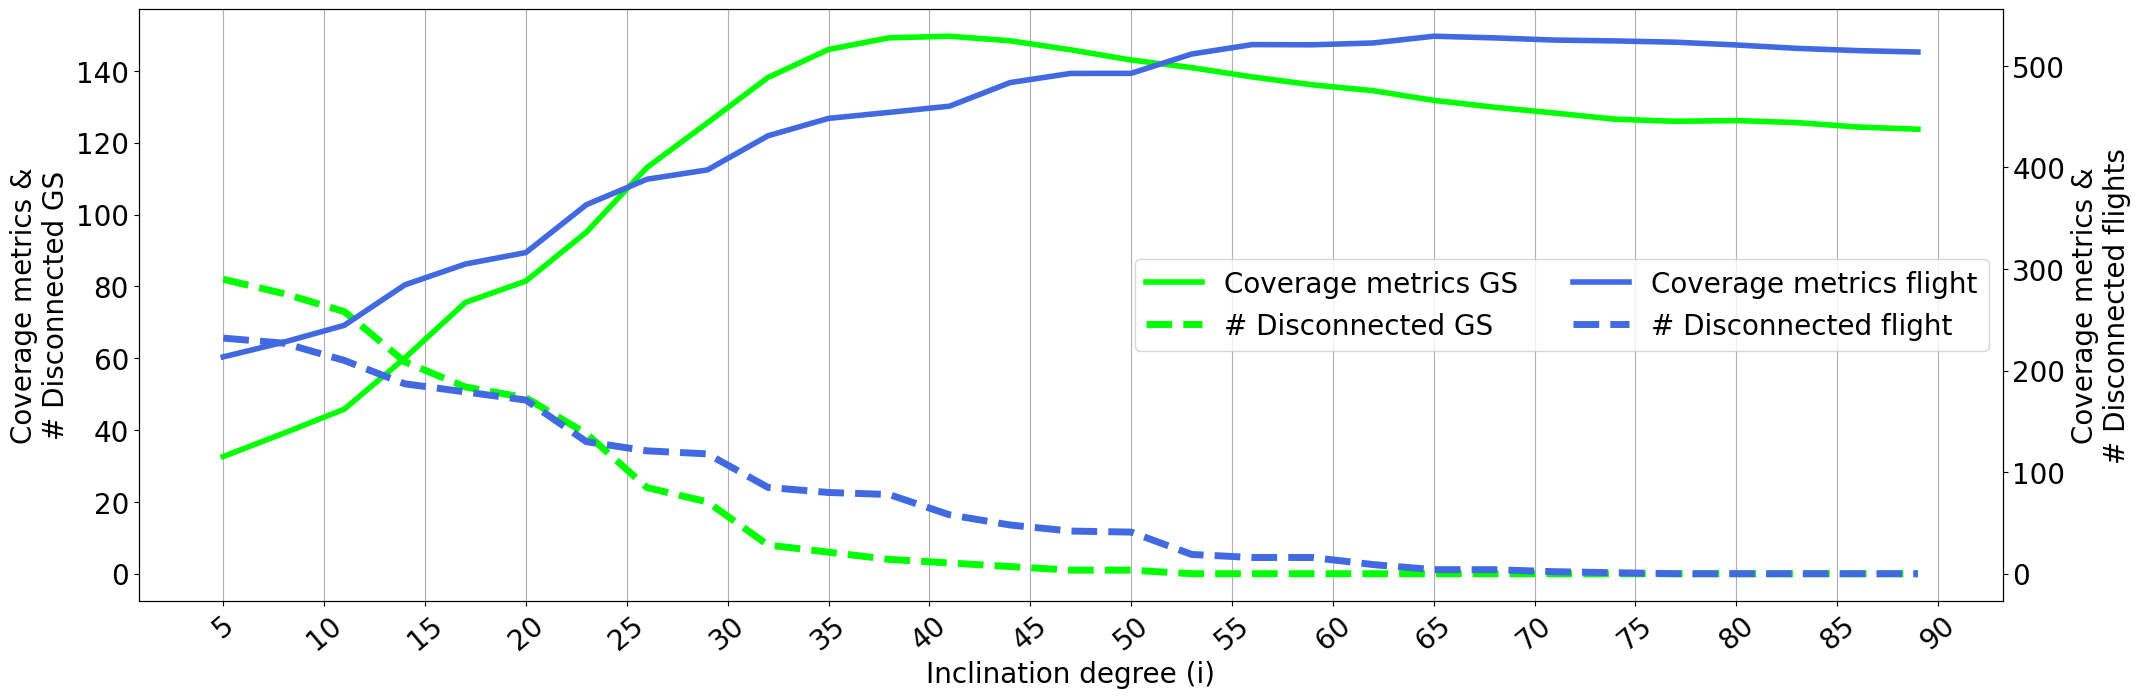

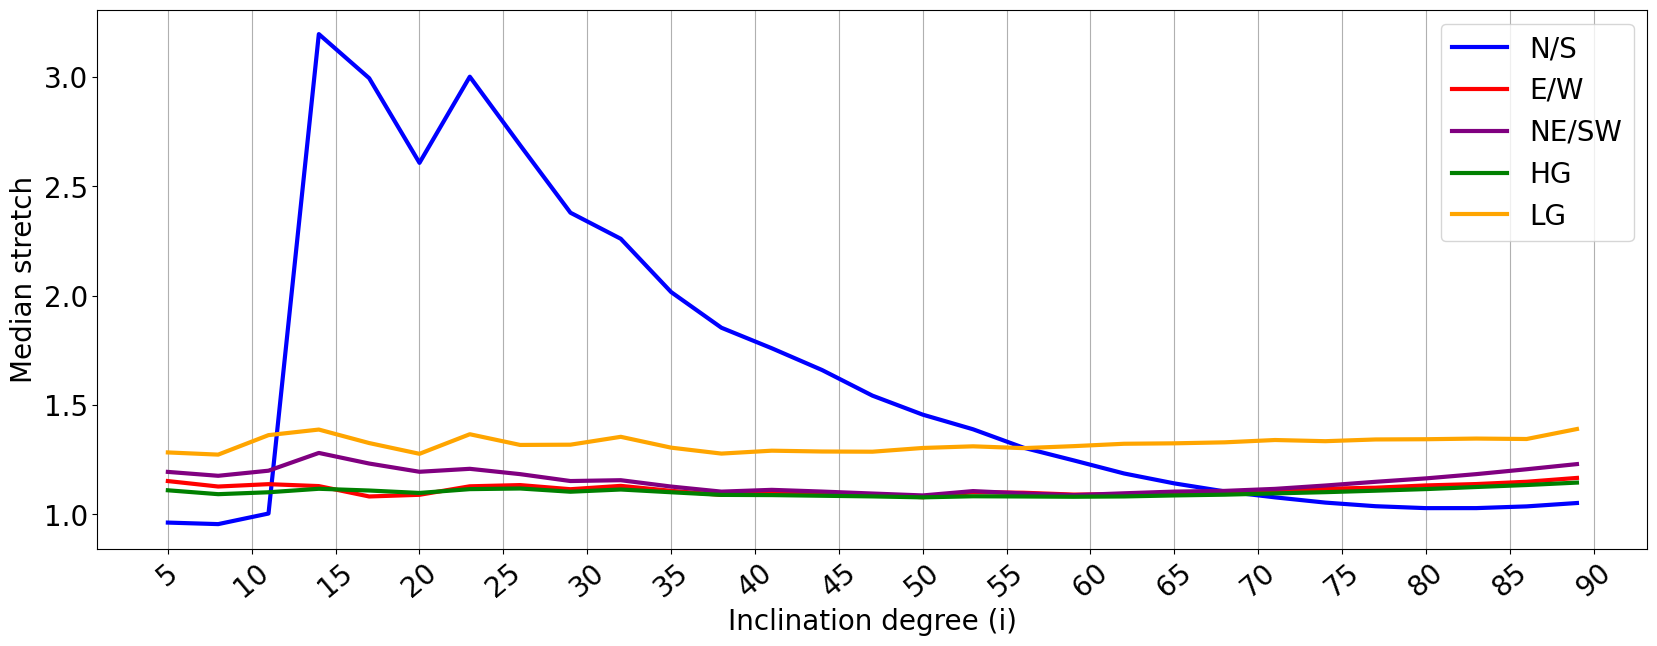

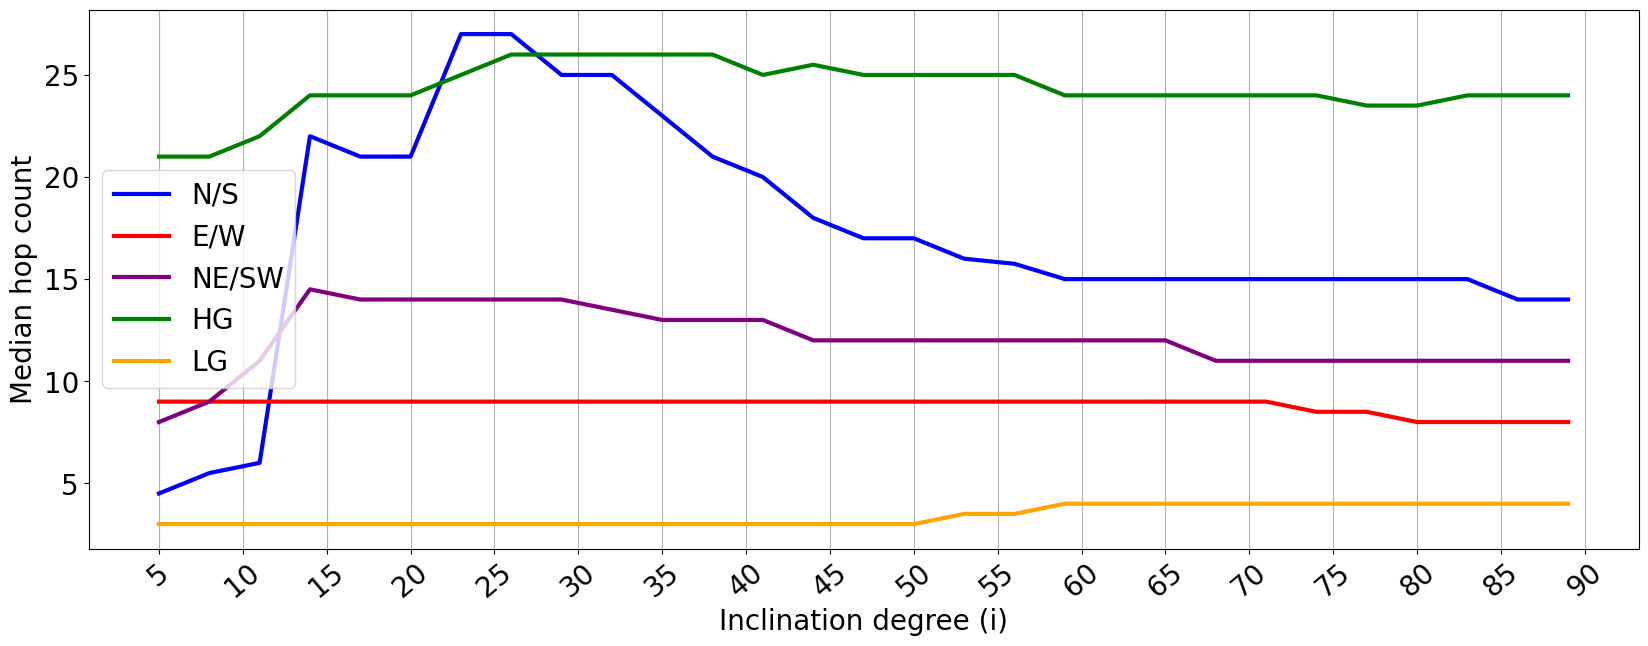

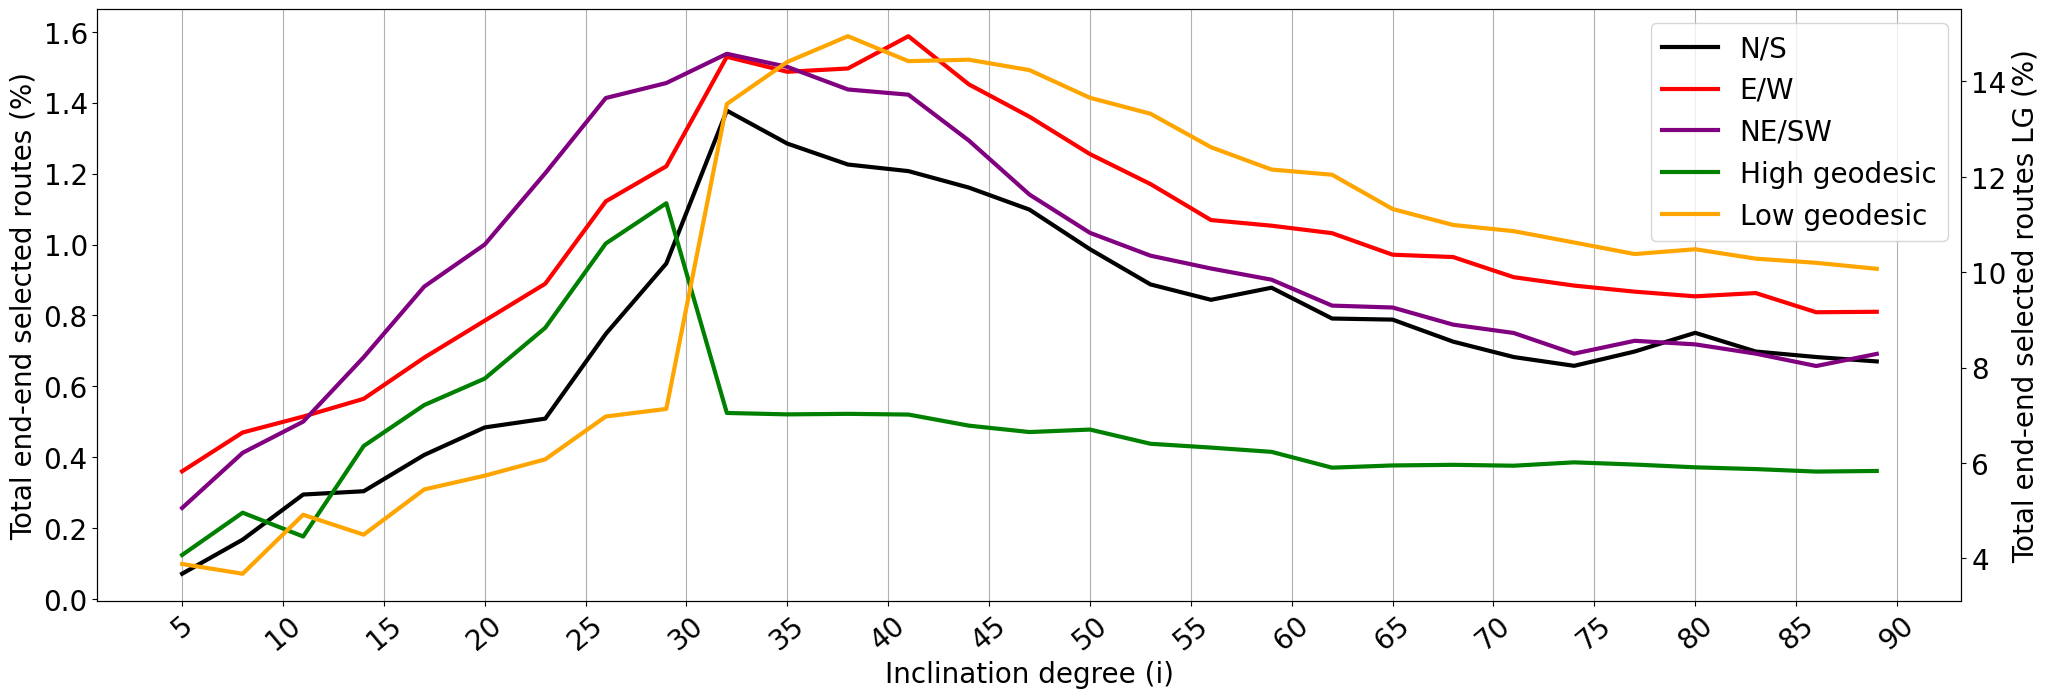

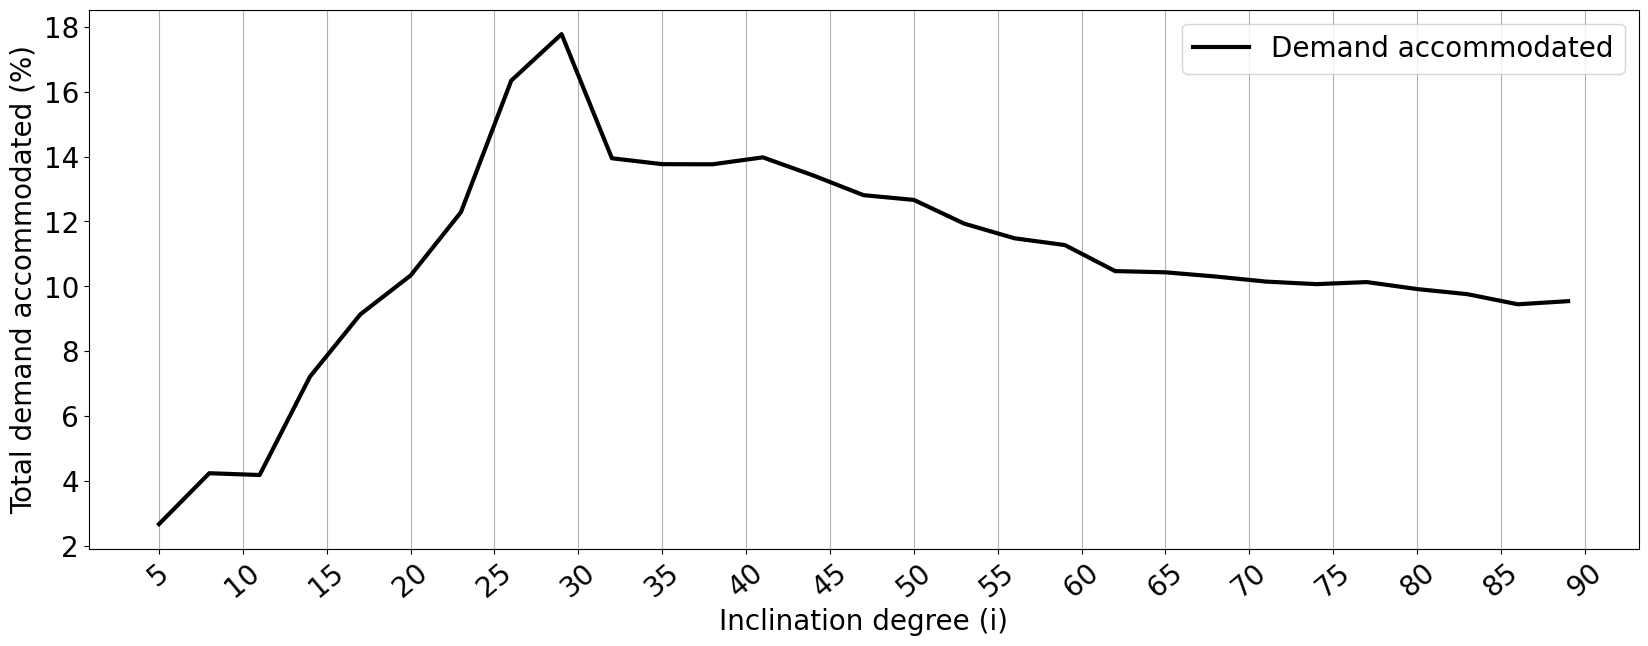

In [5]:
df = pd.read_csv('i_5_90.csv').sort_values(by='S0_i')
plot_i(df)

#### Number of orbits (o)

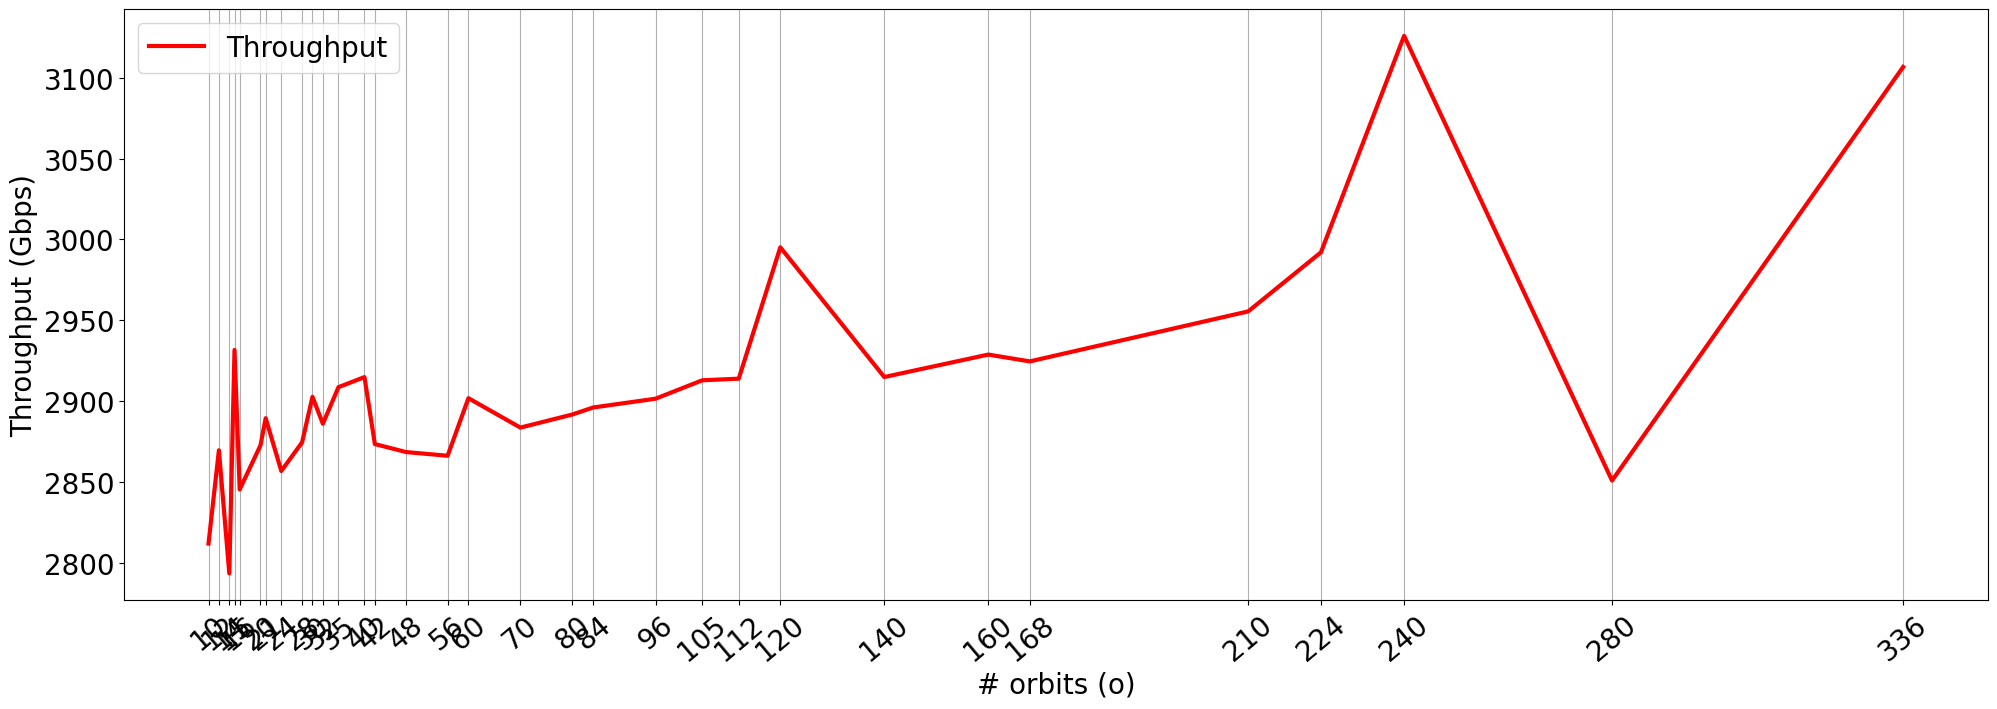

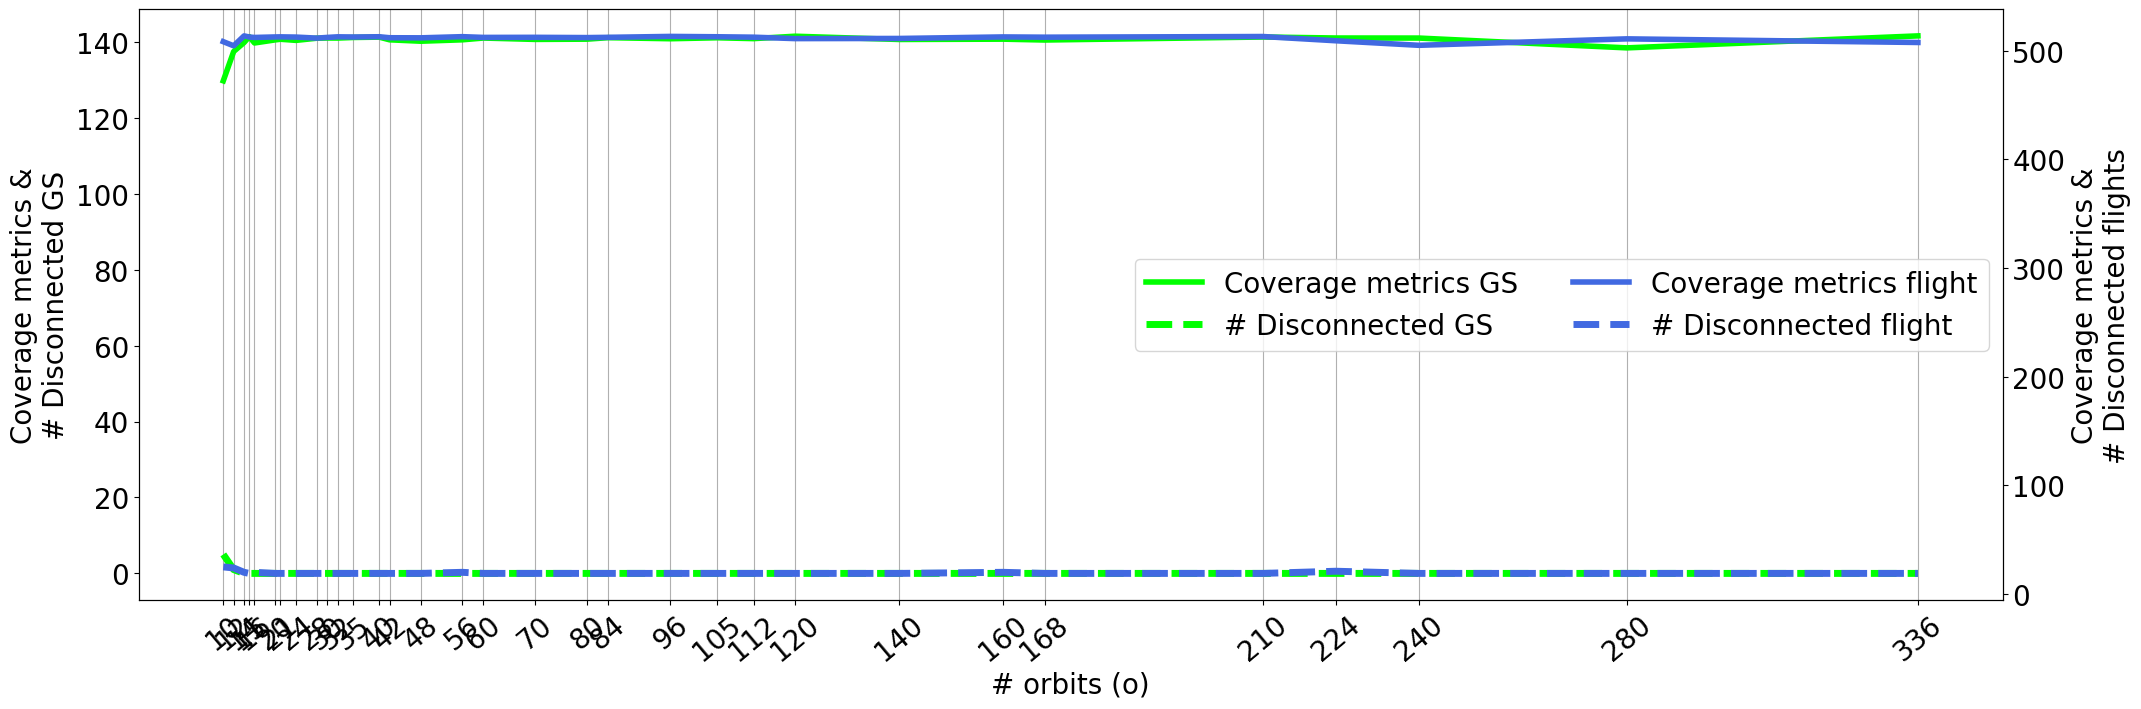

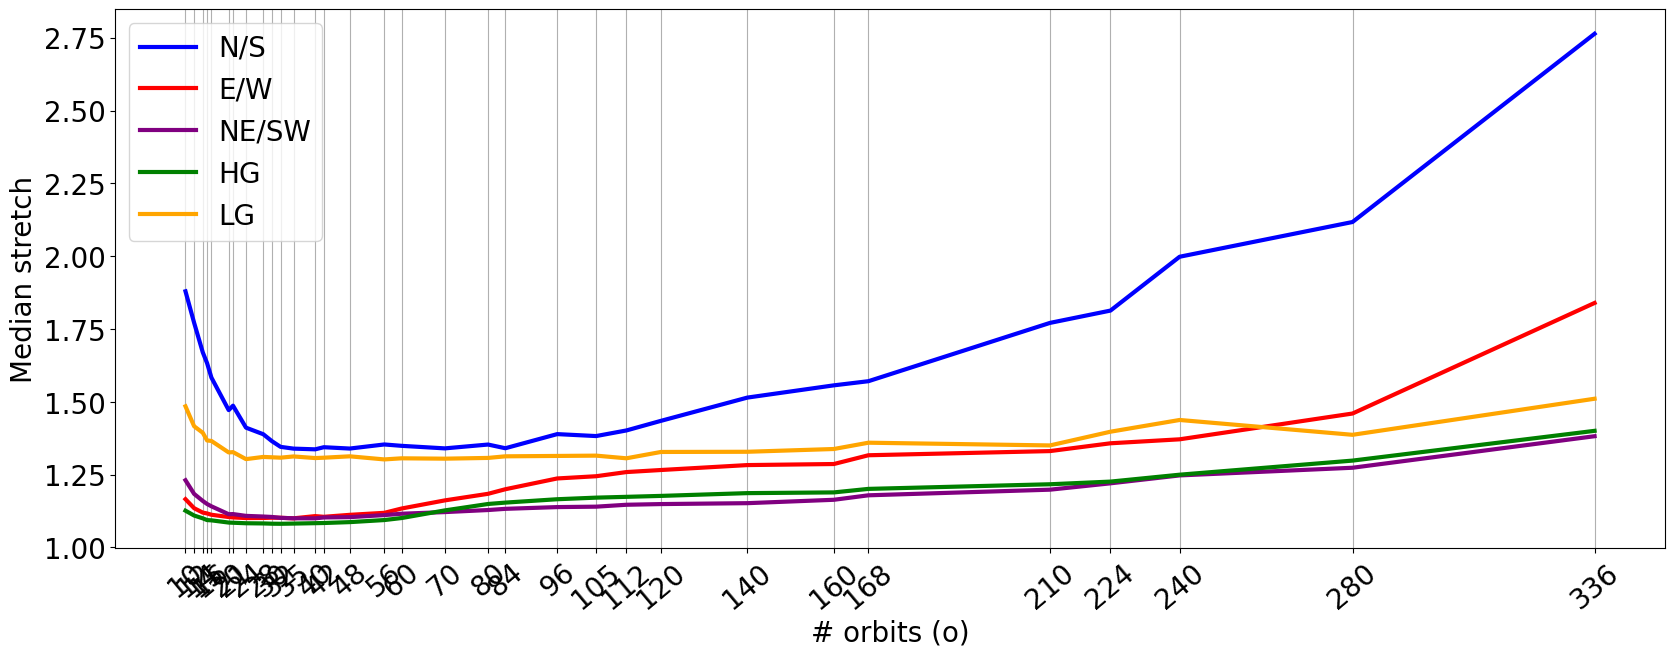

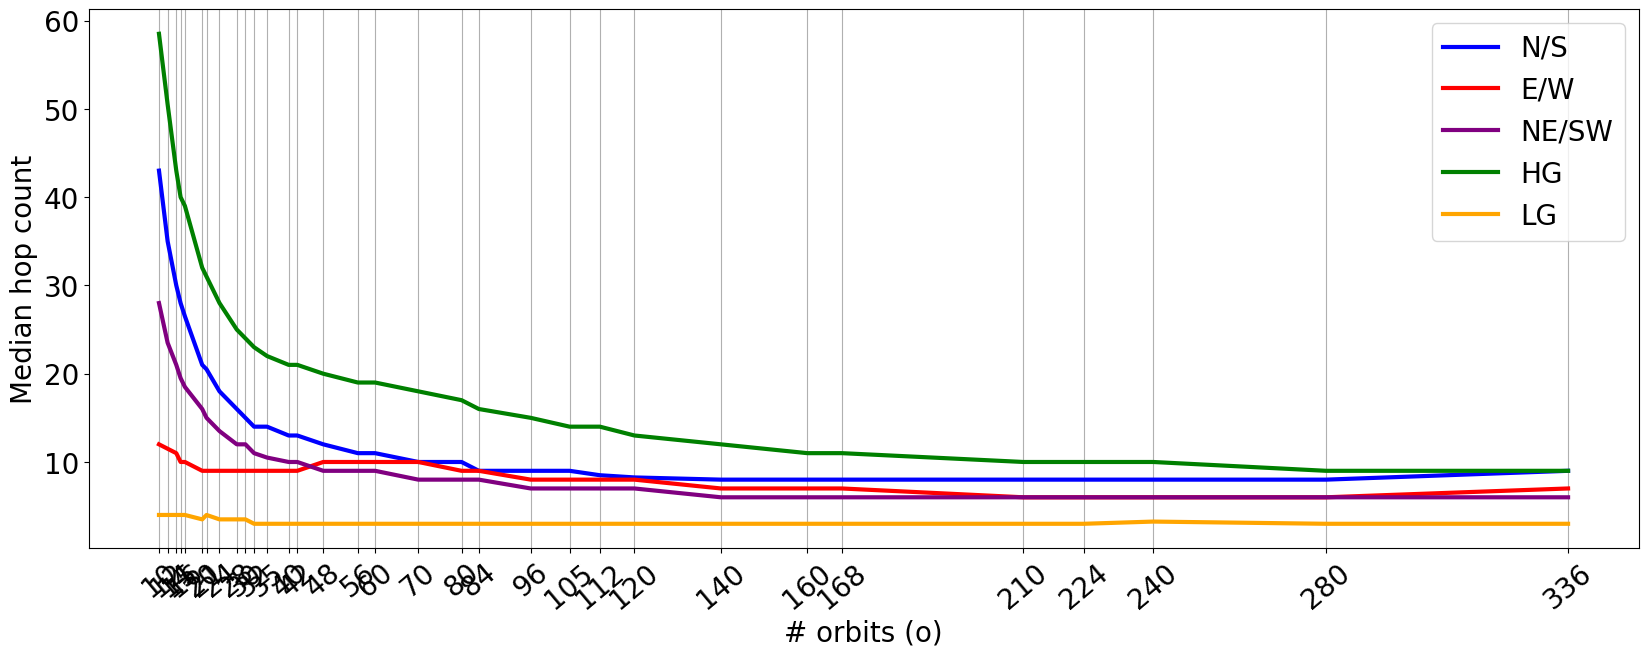

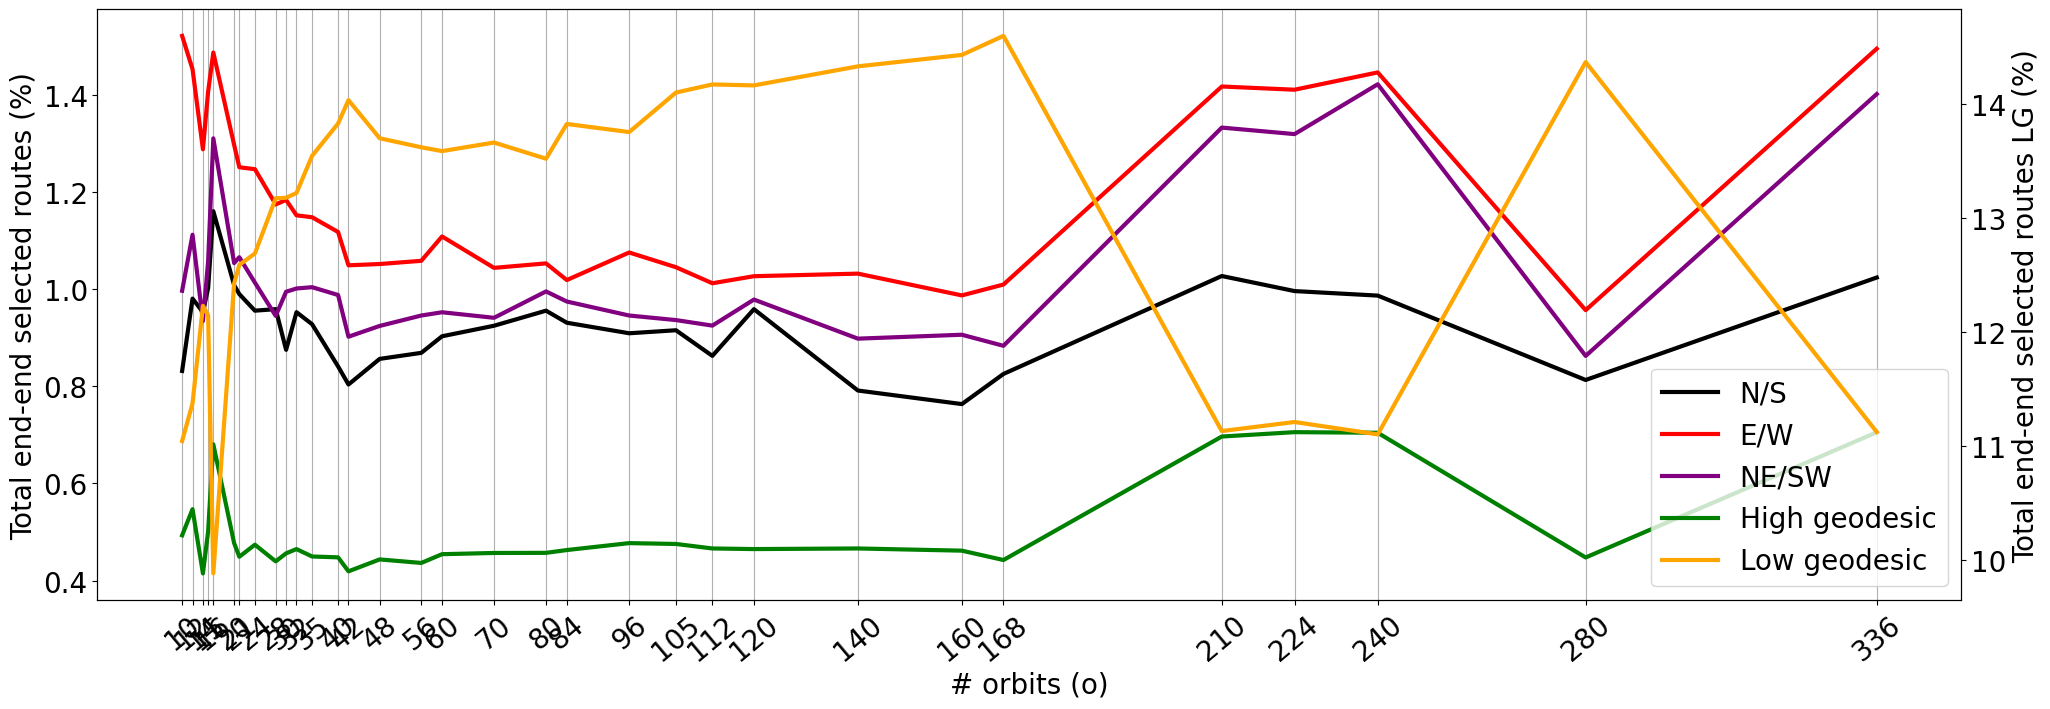

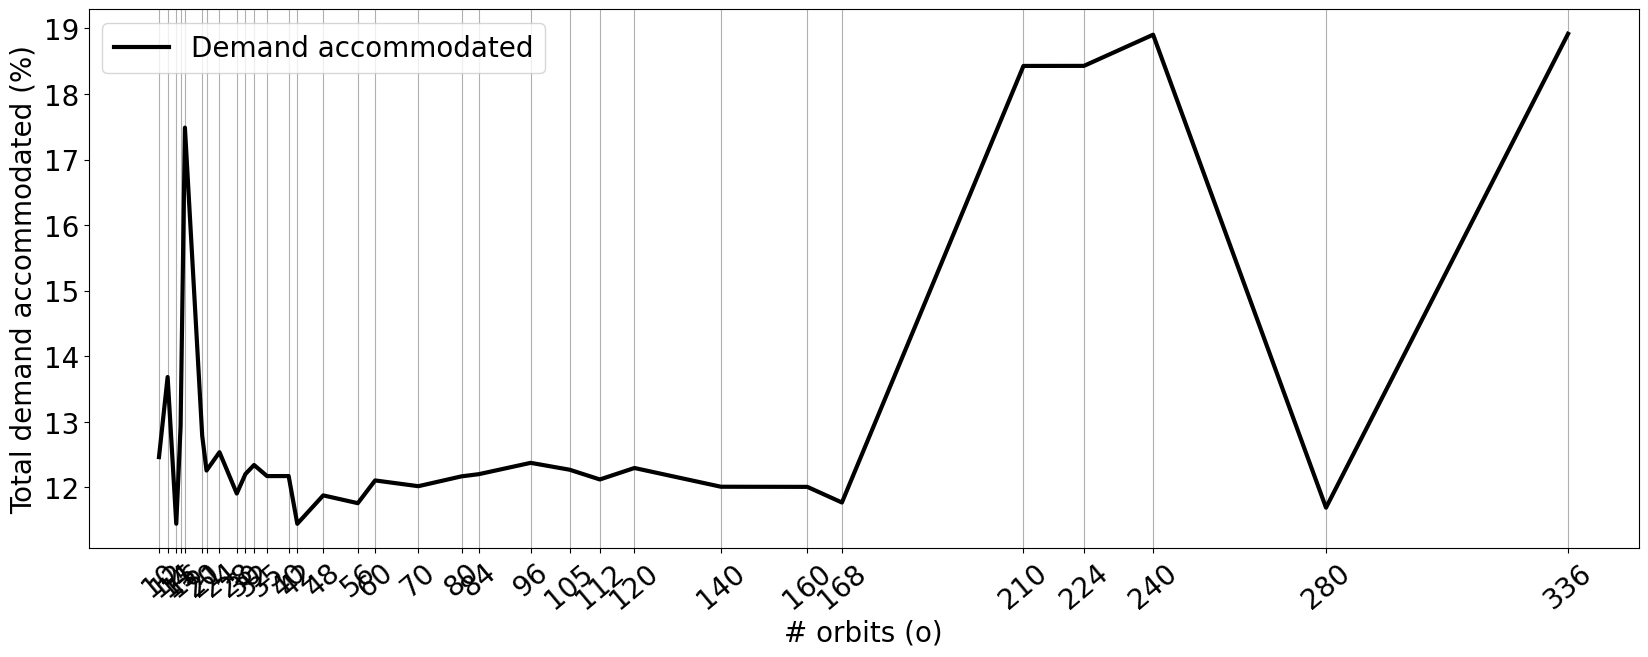

In [6]:
df = pd.read_csv('oxn.csv').sort_values(by='S0_o')
plot_o(df)

#### Phase offset (p)

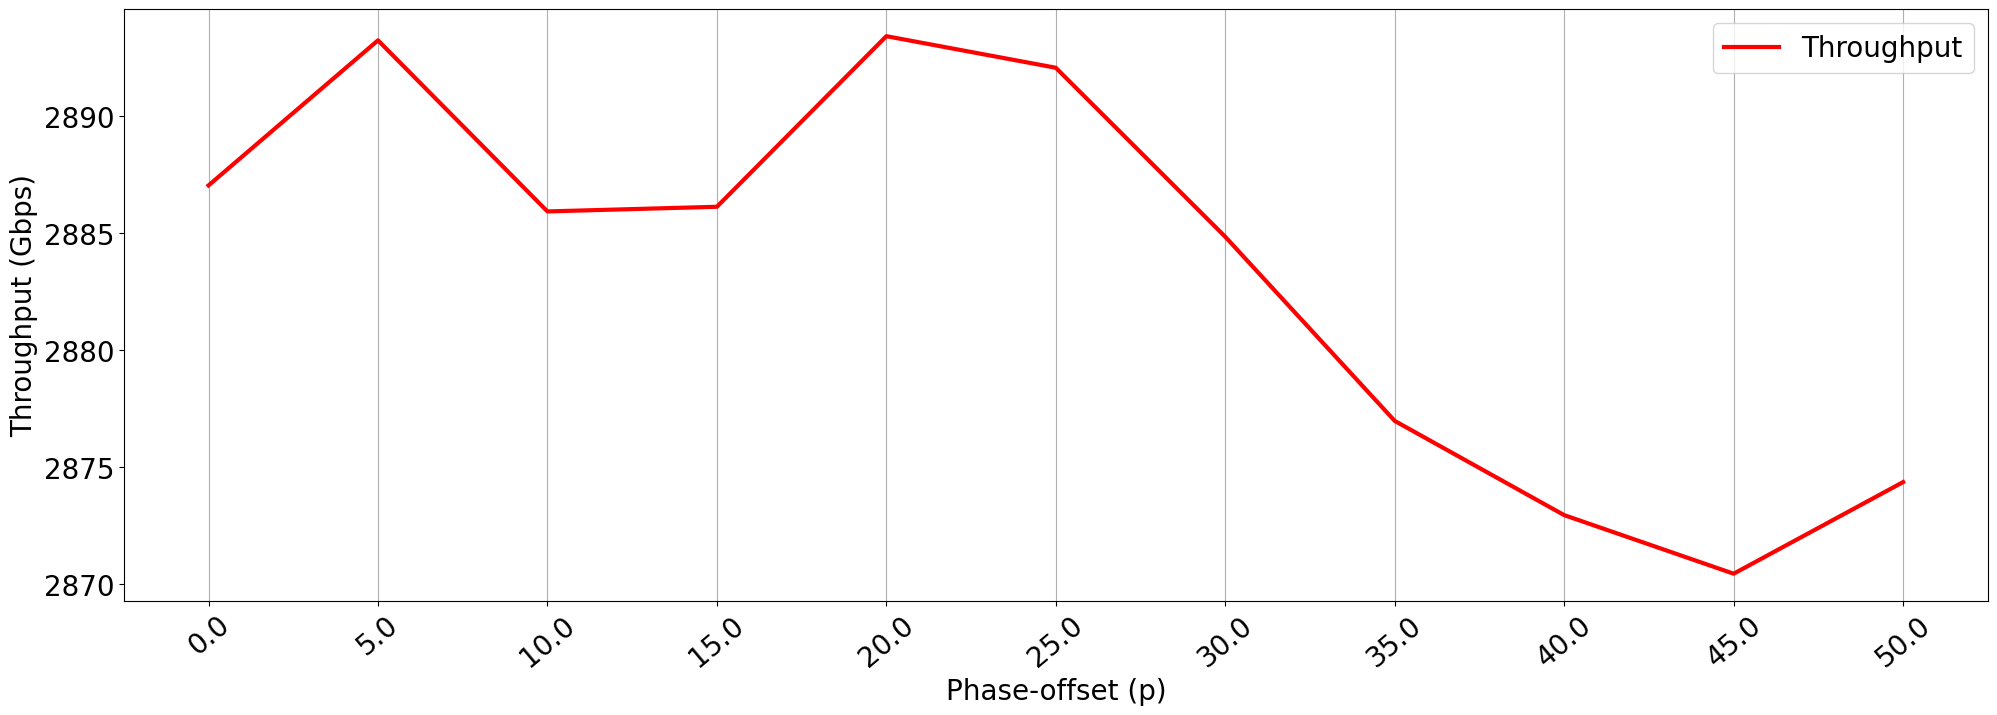

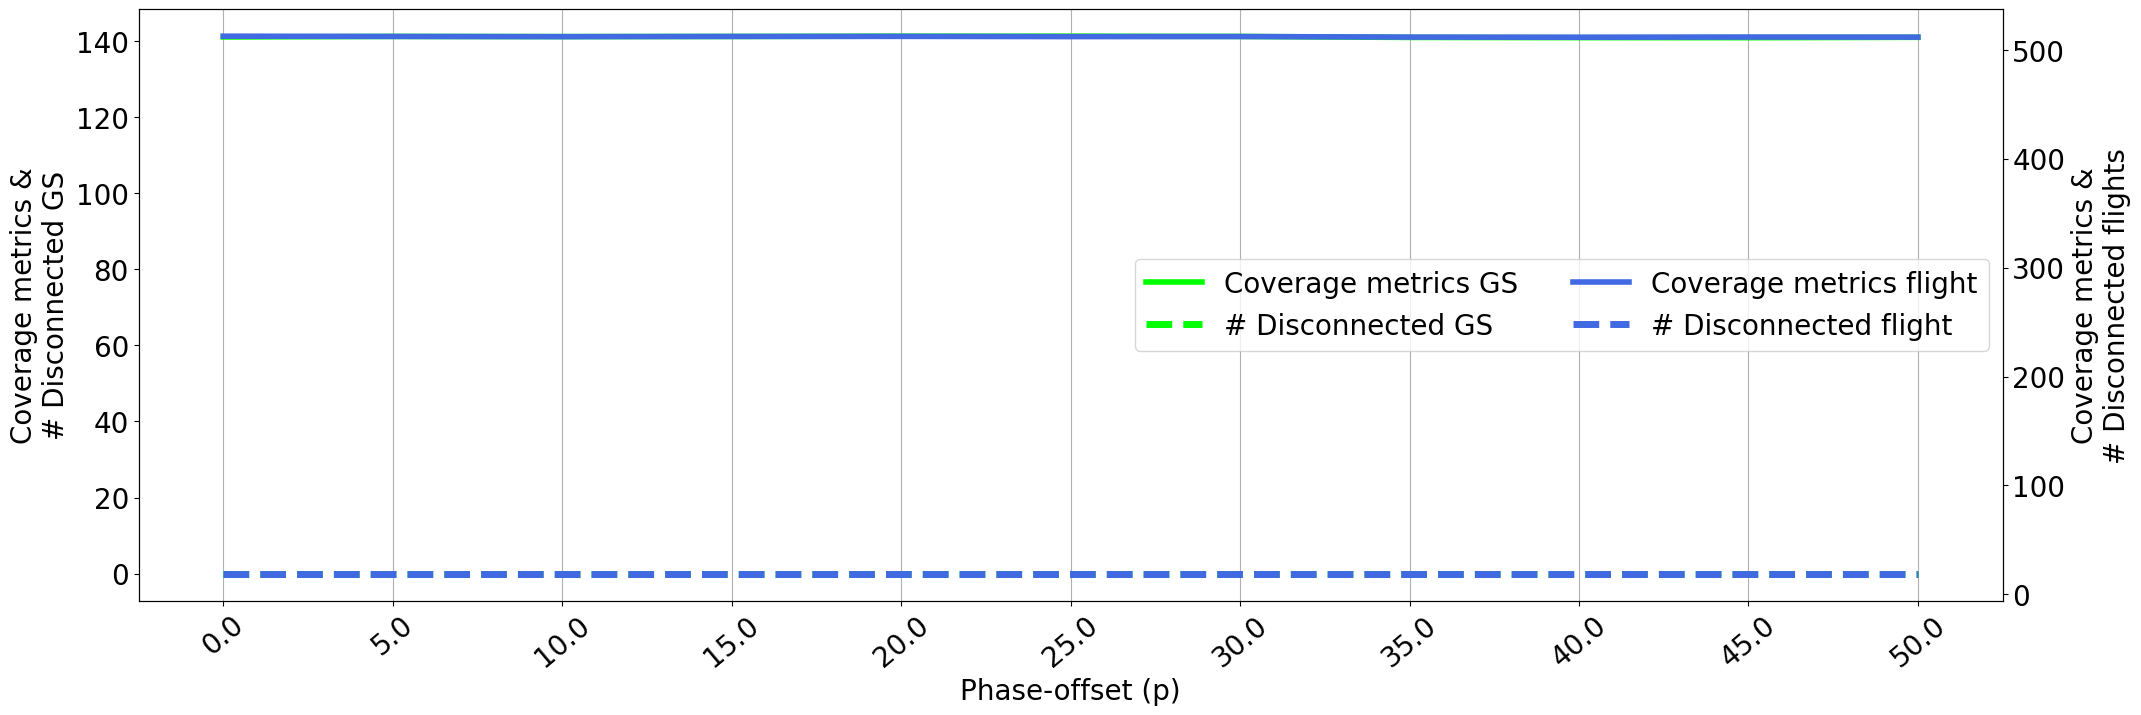

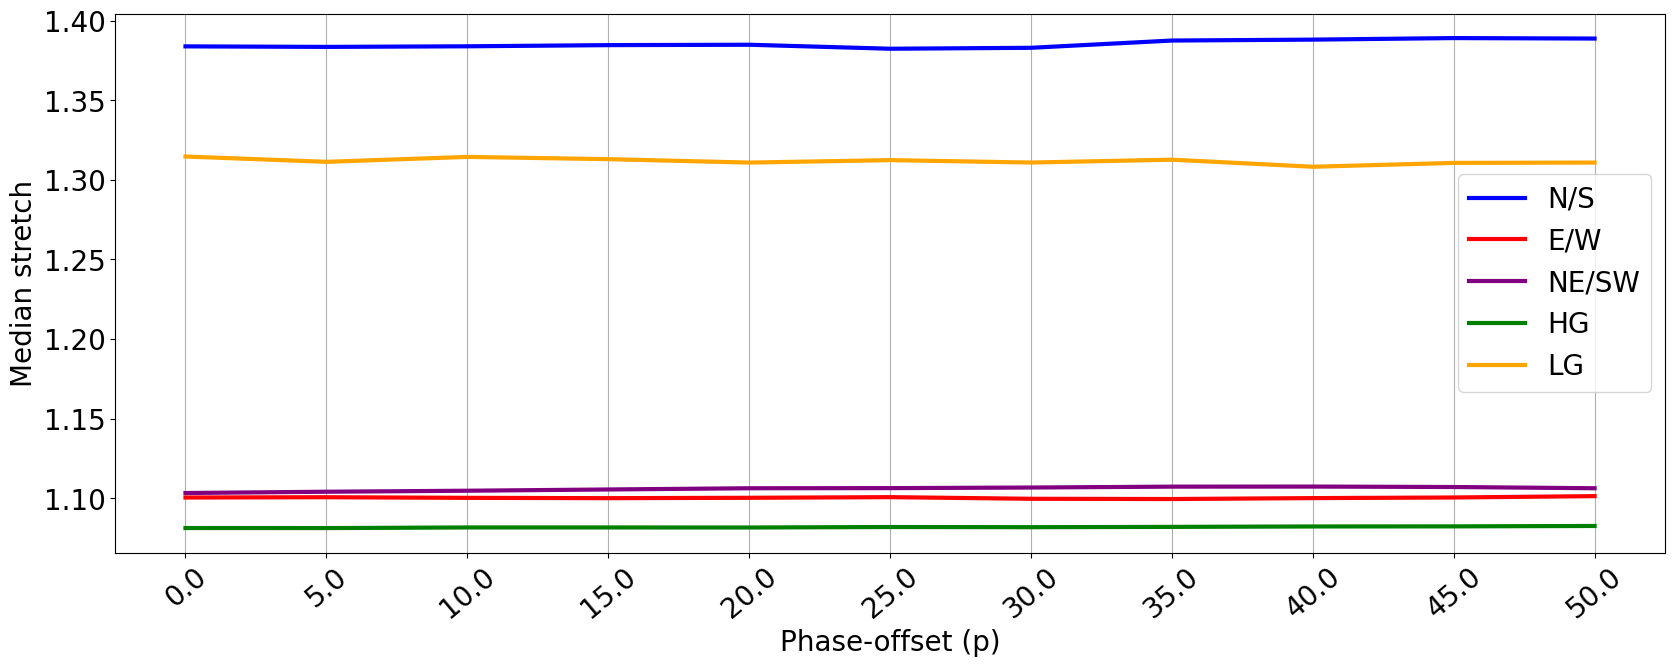

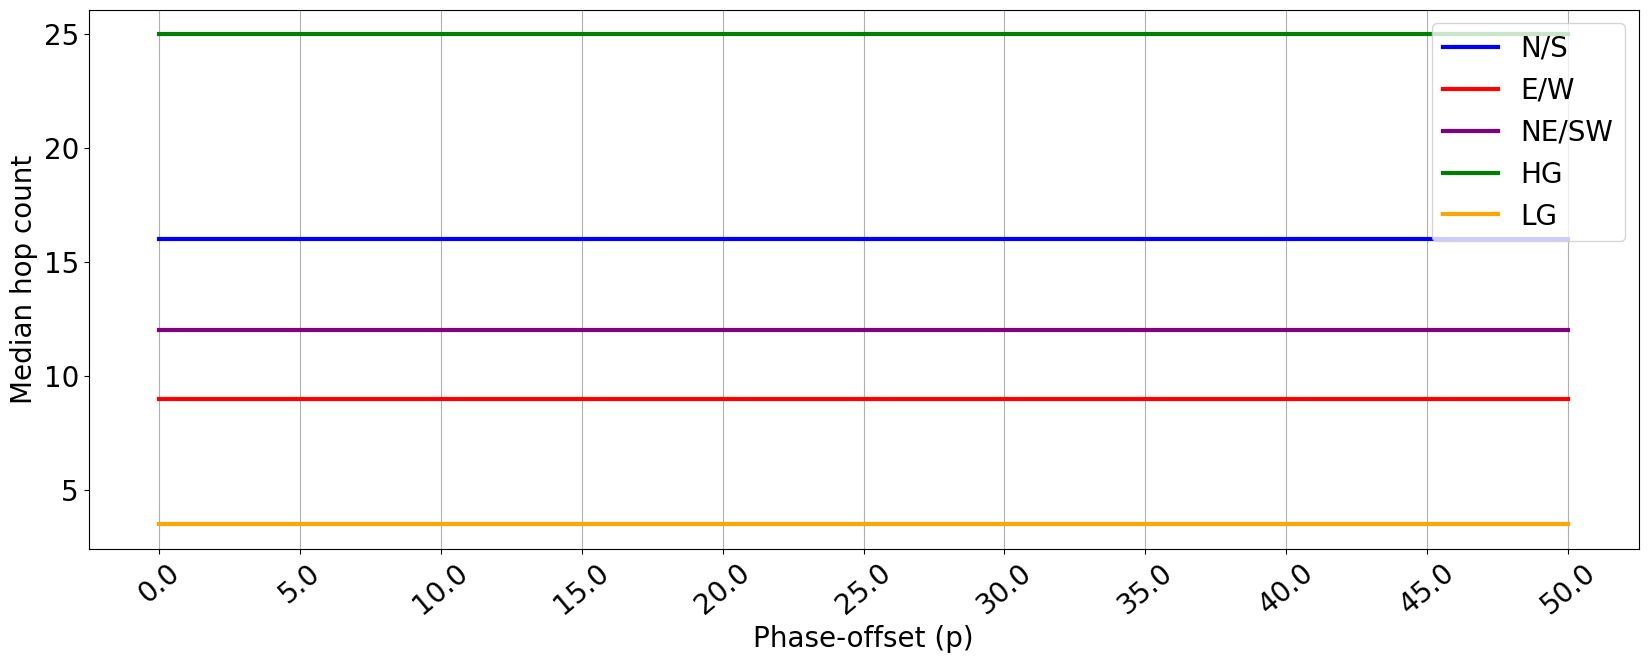

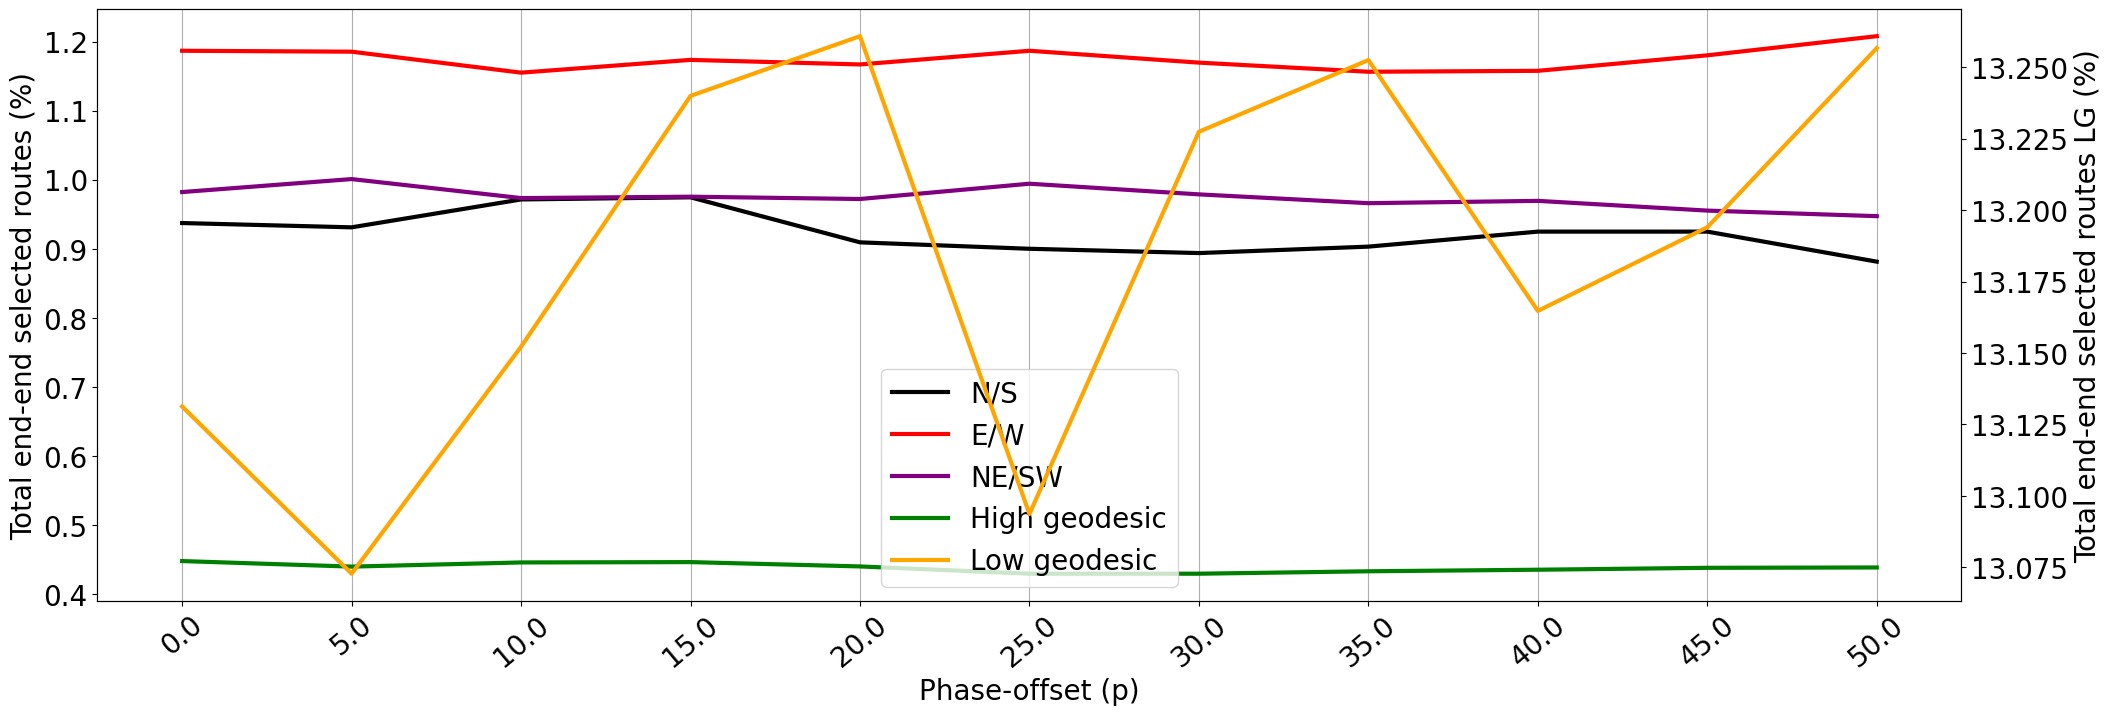

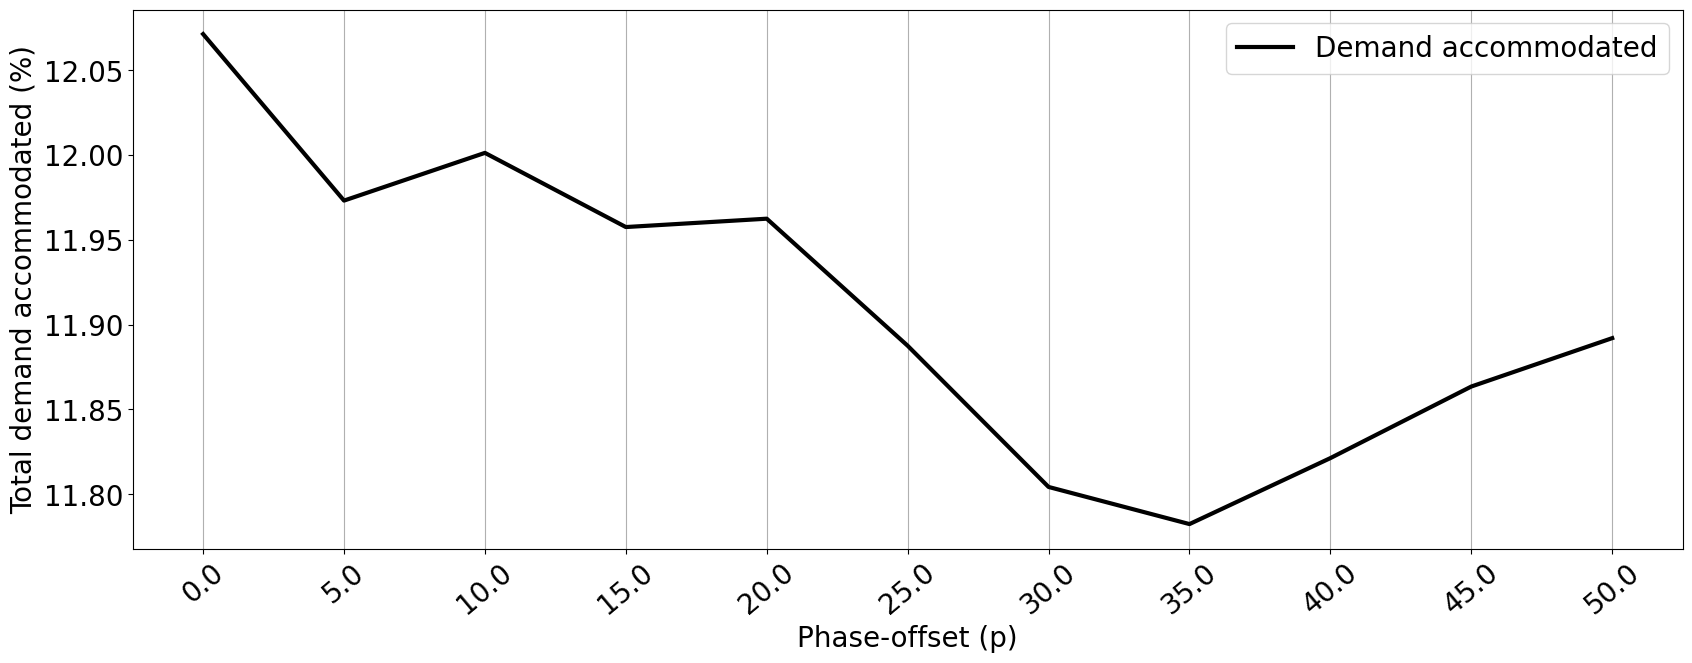

In [7]:
df = pd.read_csv('p_0_50.csv').sort_values(by='S0_p')
plot_p(df)

### HP Region

#### HP Phase offset (p)

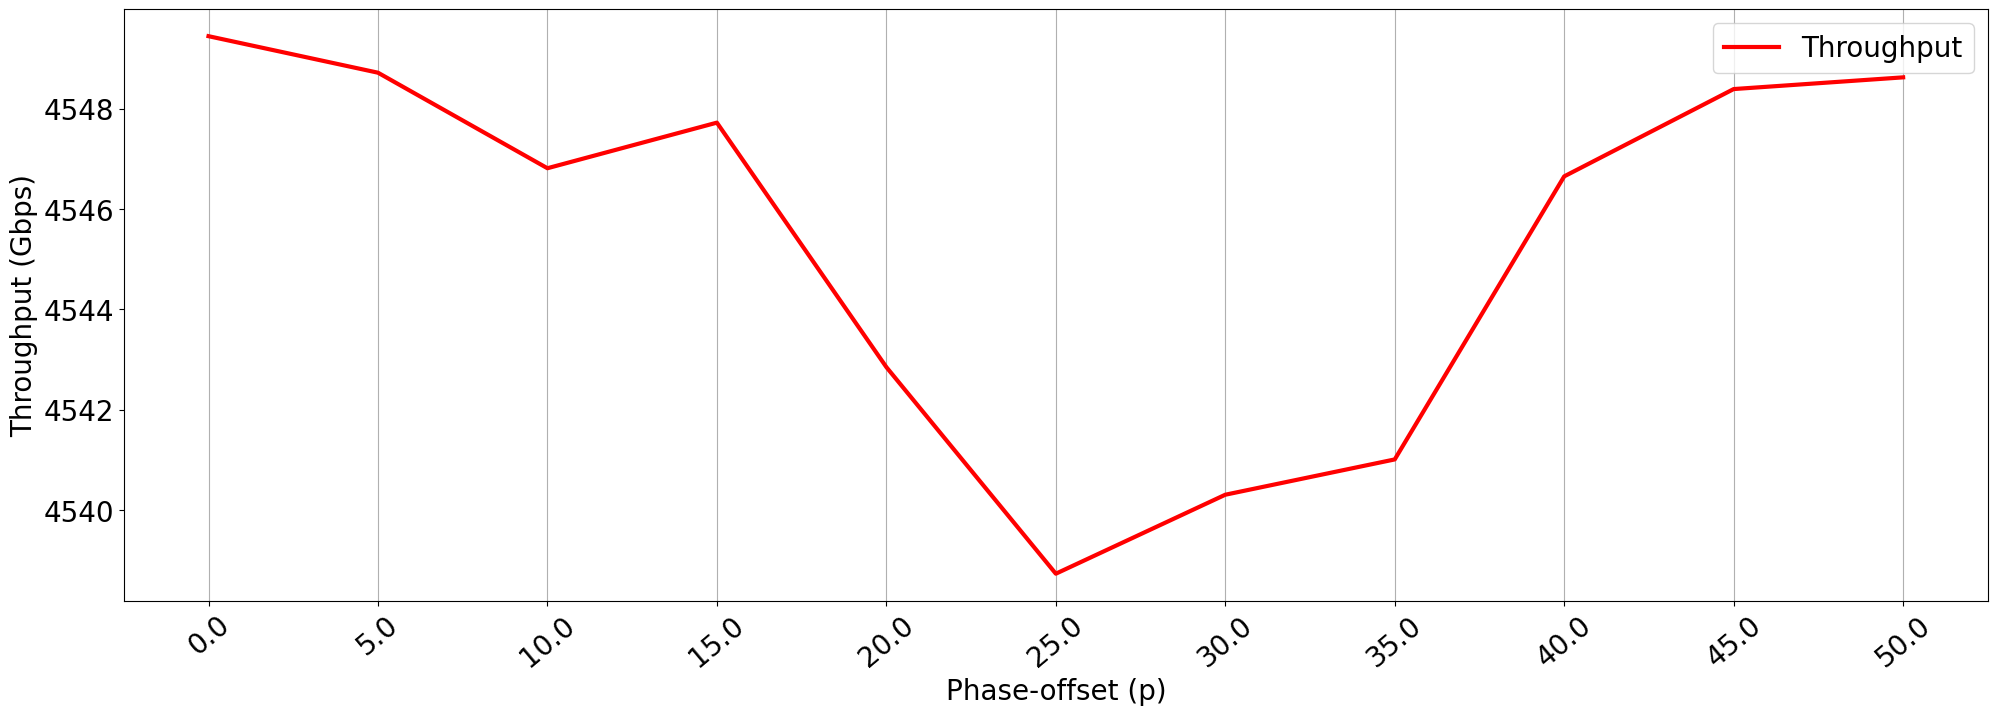

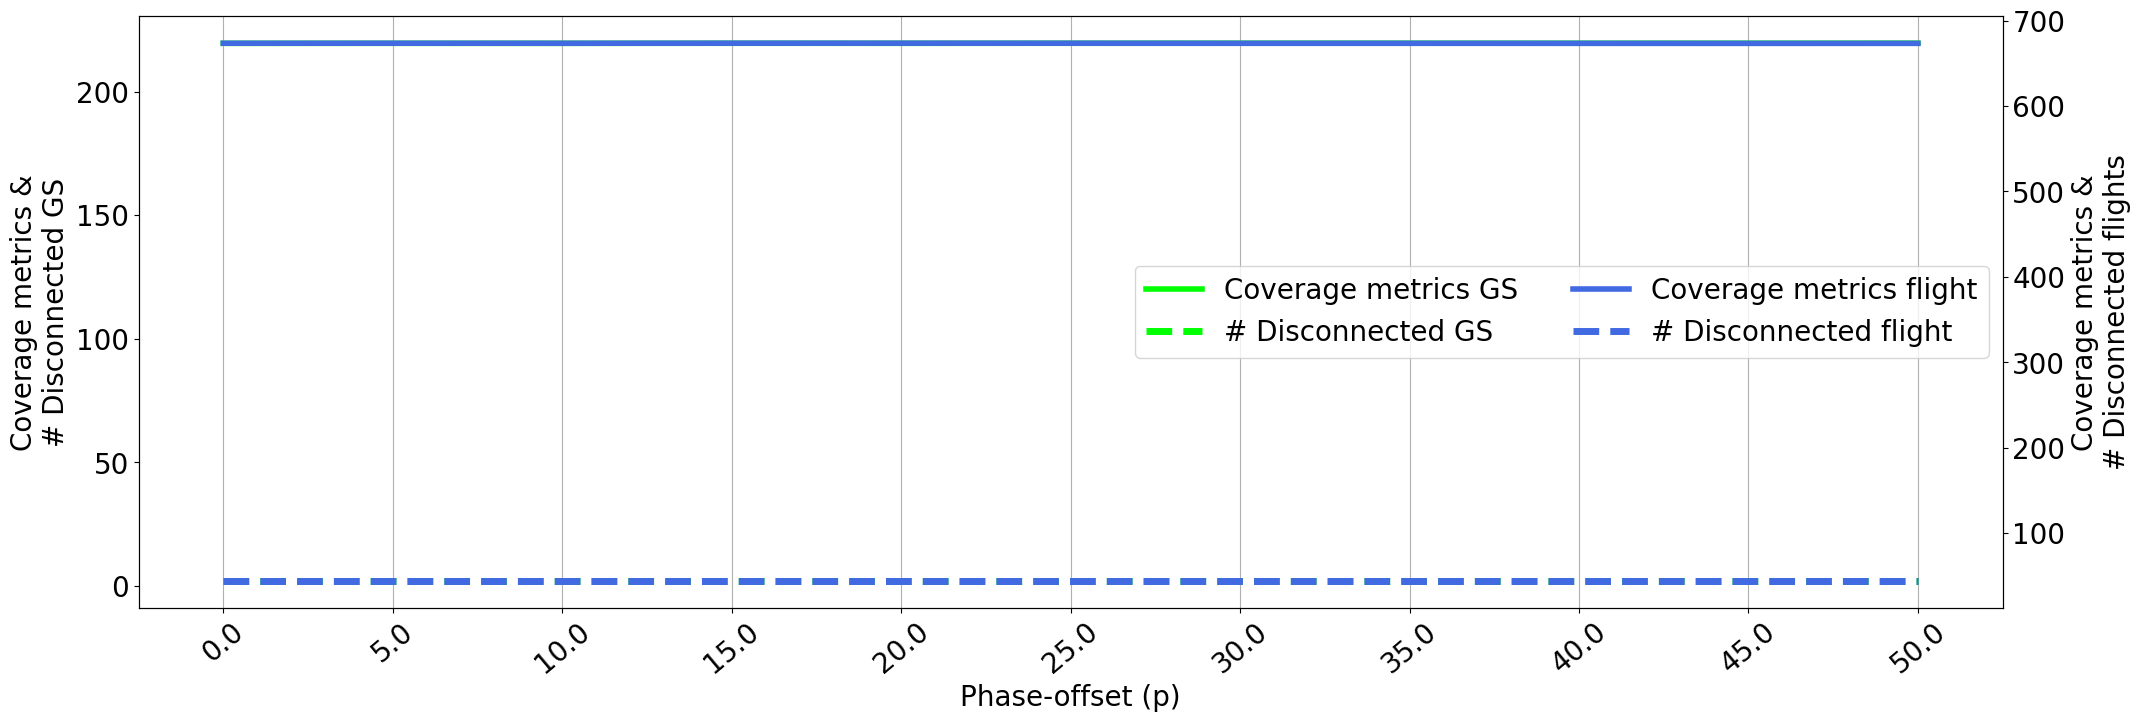

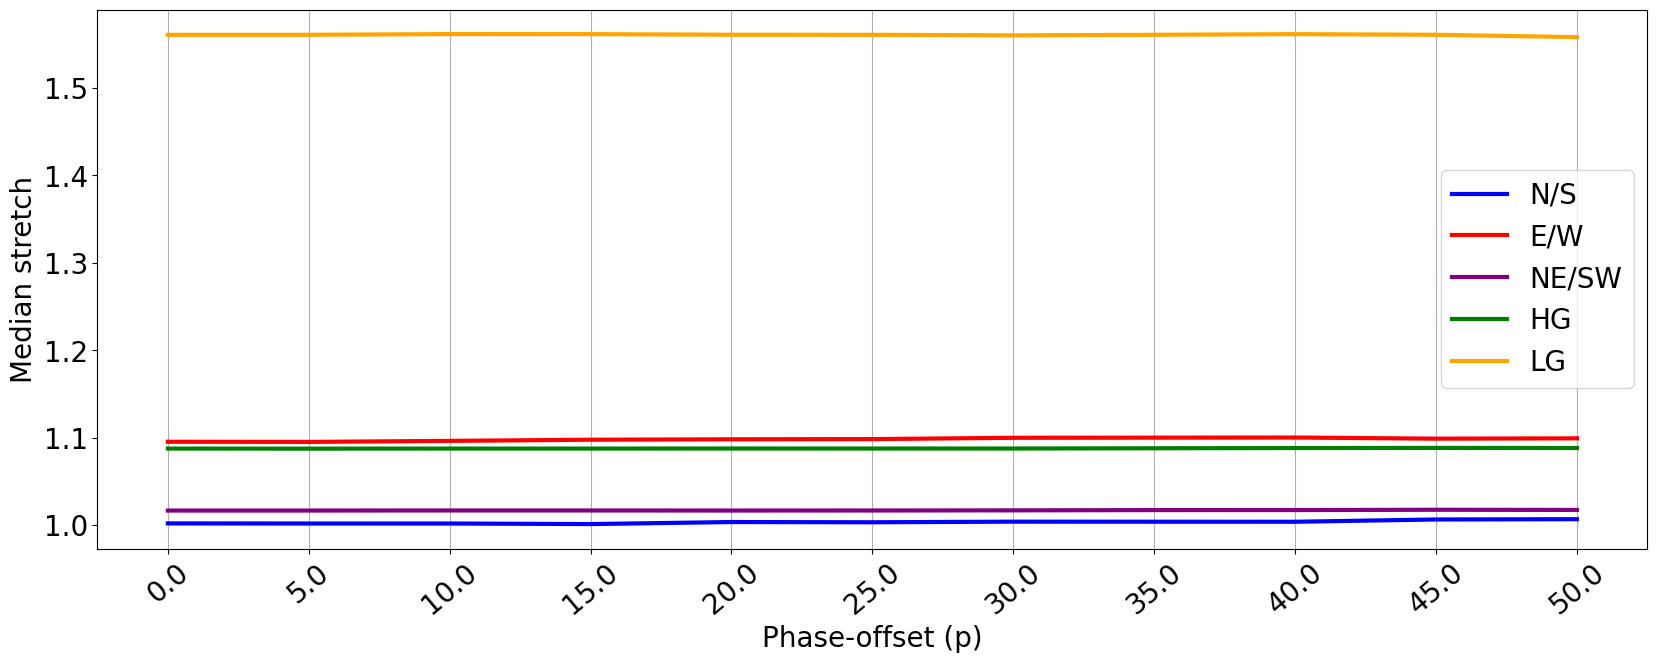

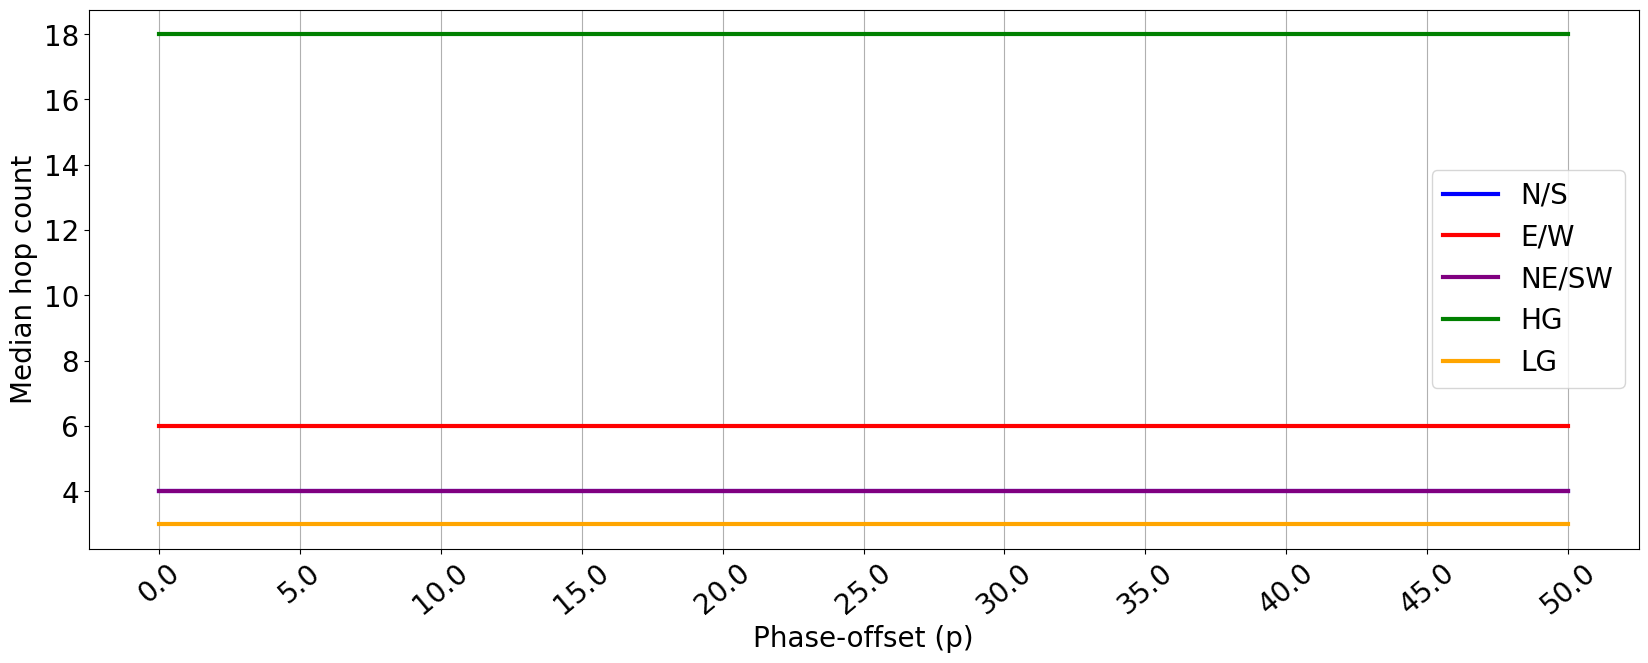

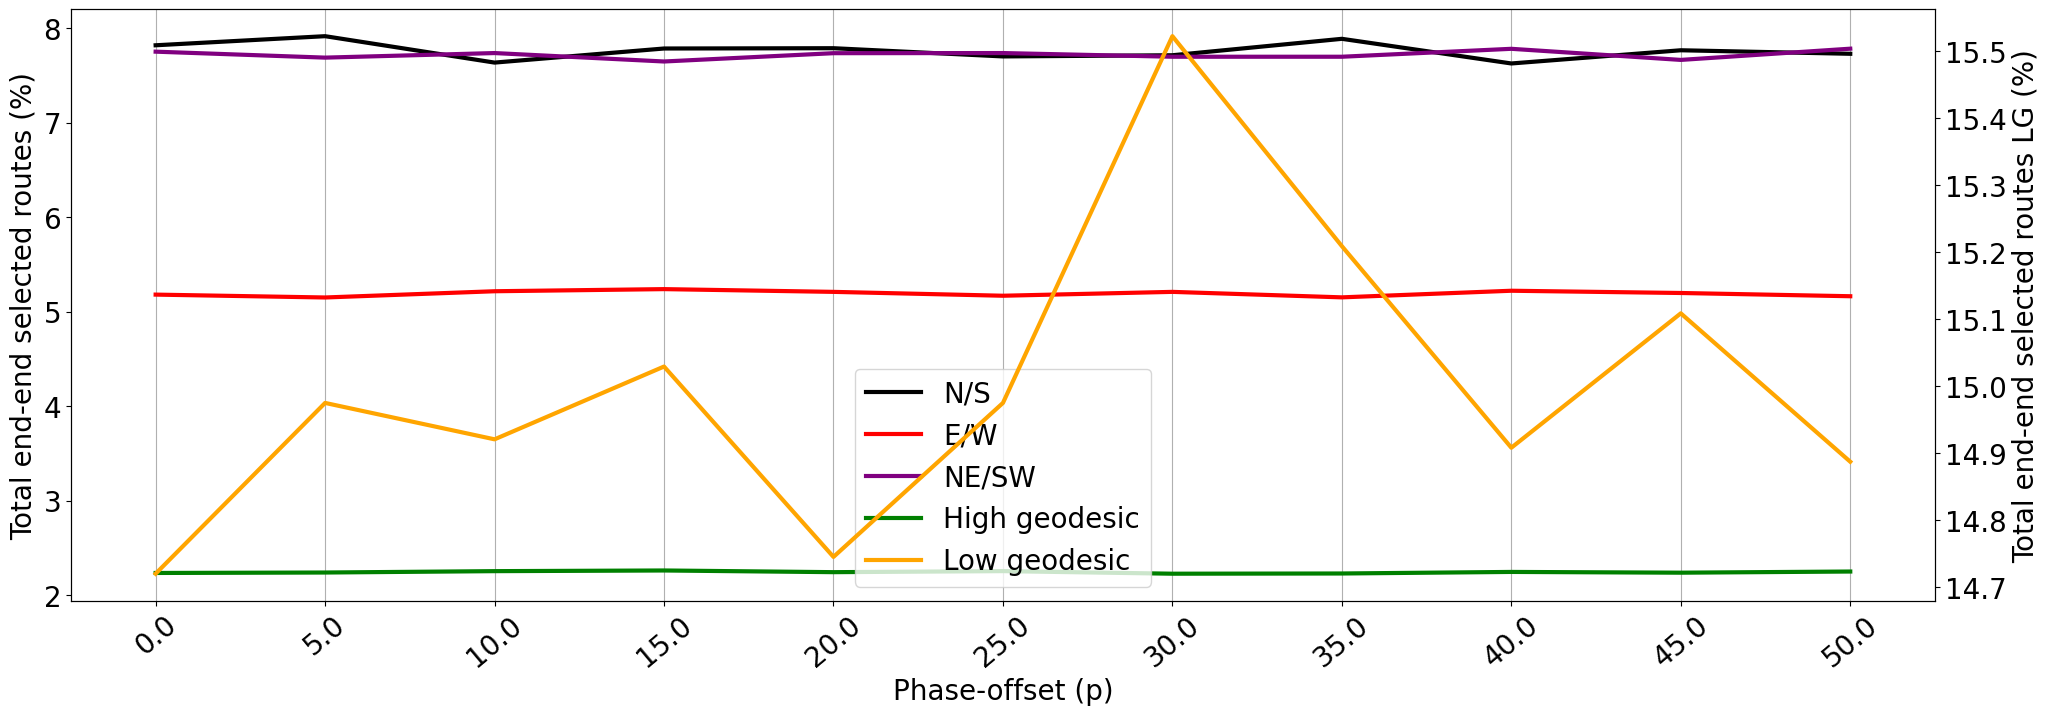

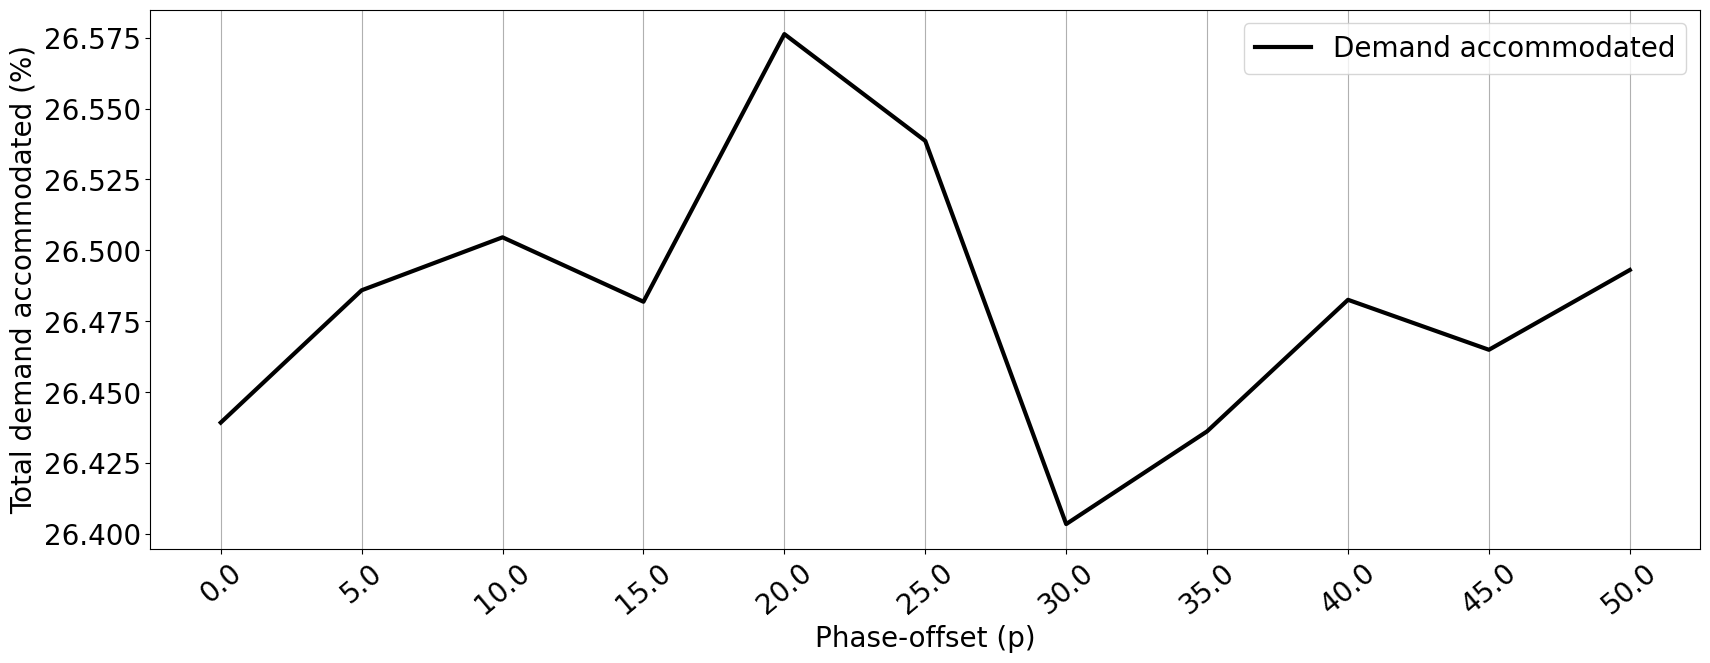

In [8]:
df = pd.read_csv('HP_p_0_50.csv').sort_values(by='S0_p')
plot_p(df)

#### HP Number of orbits (o)

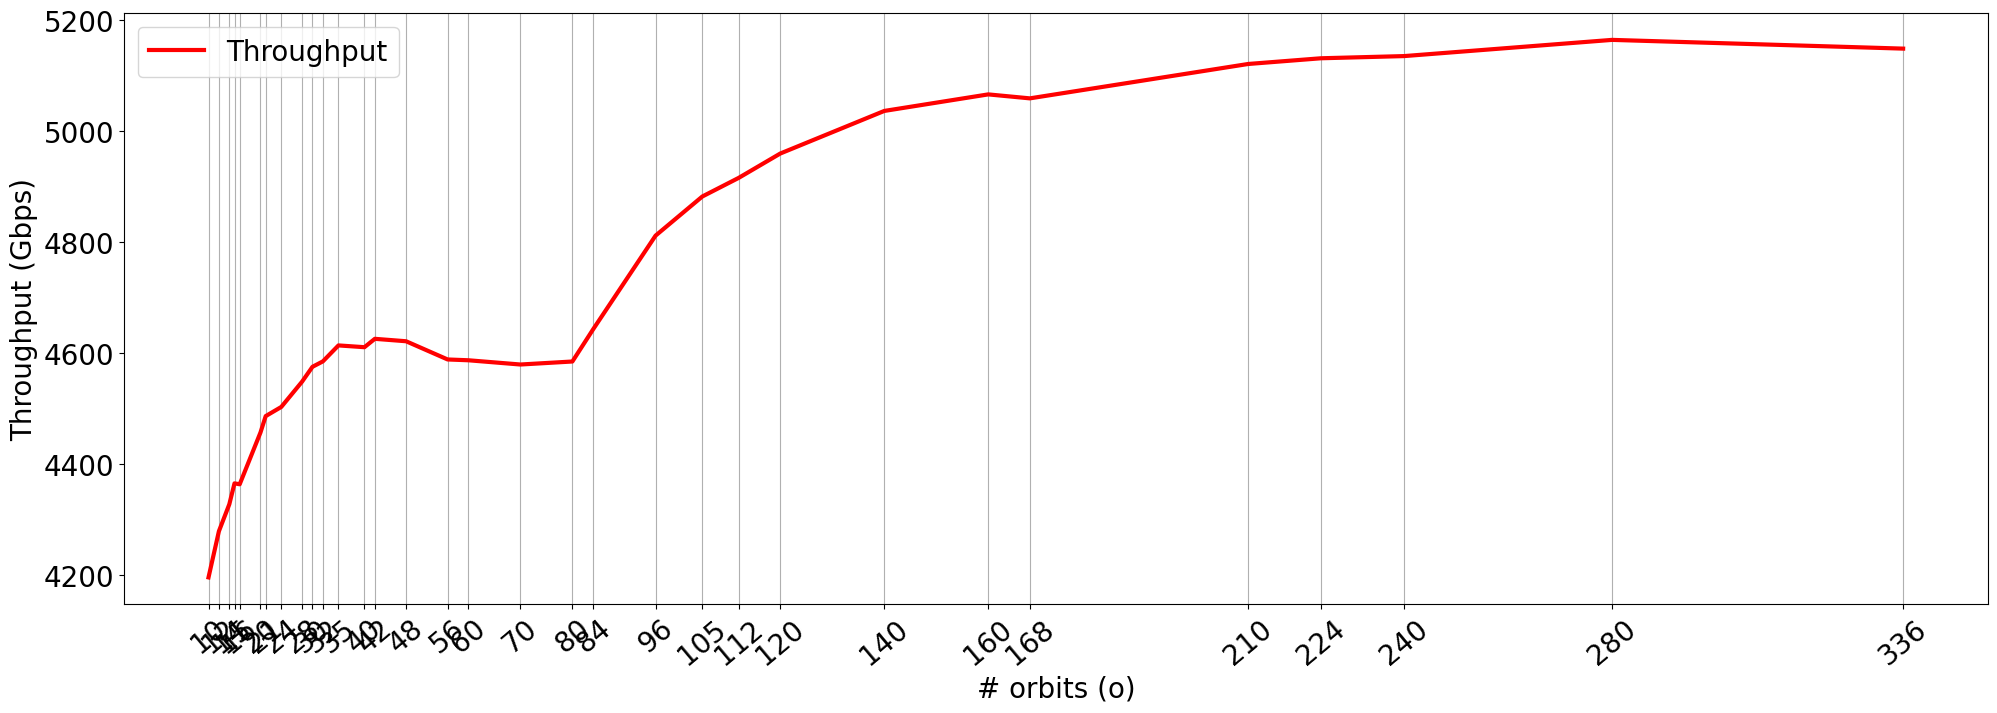

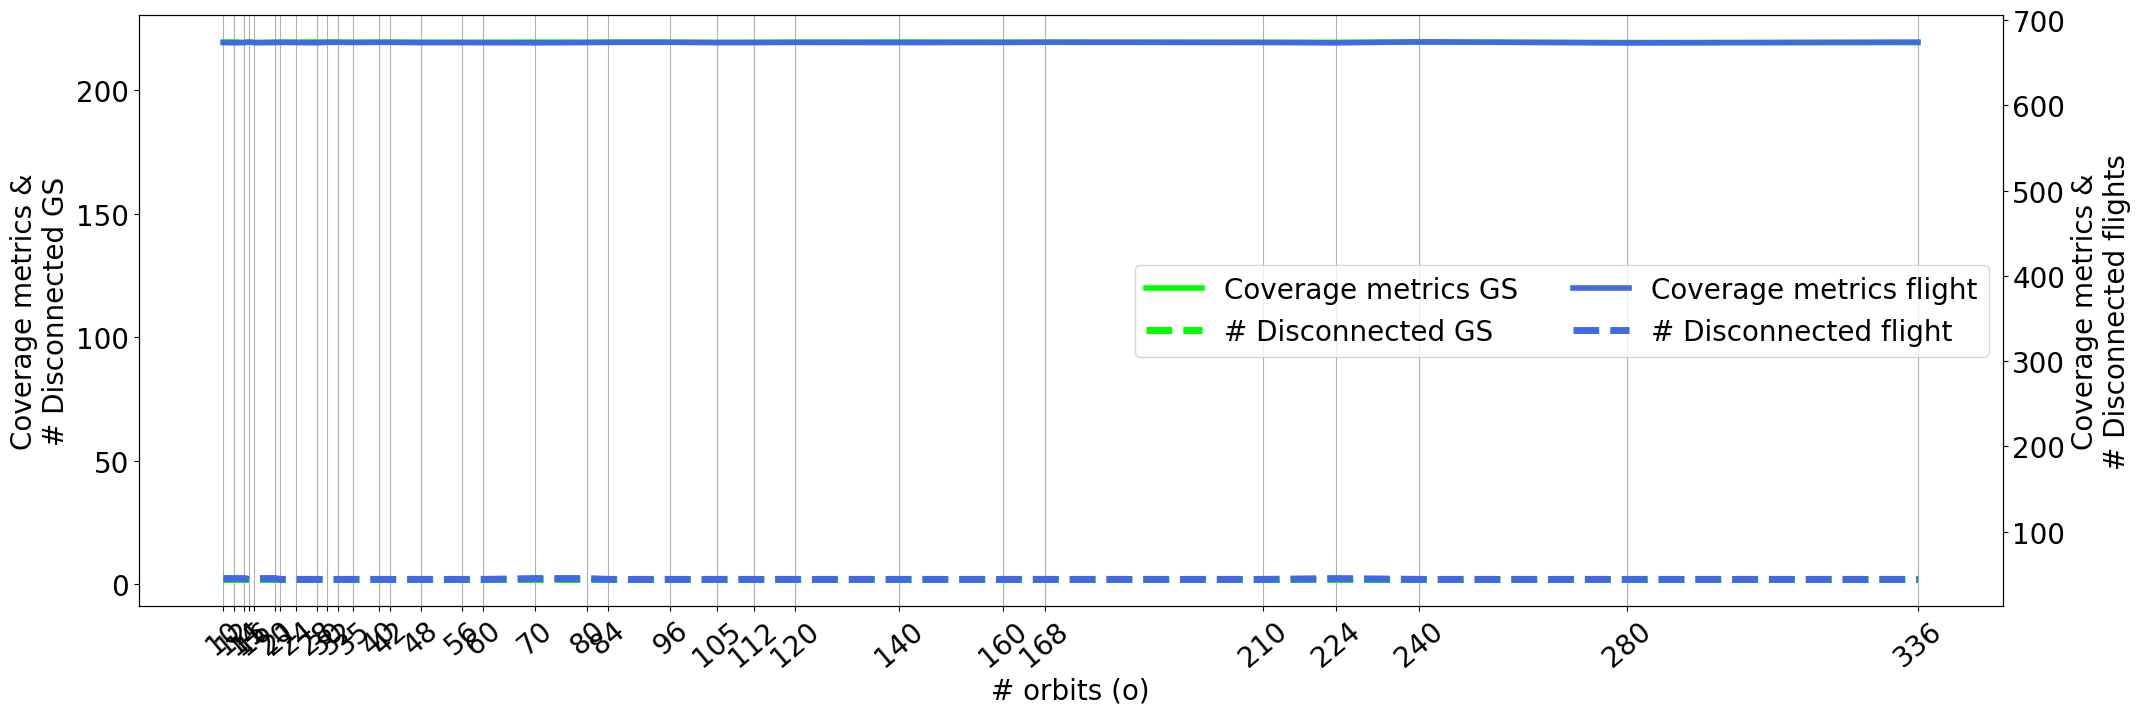

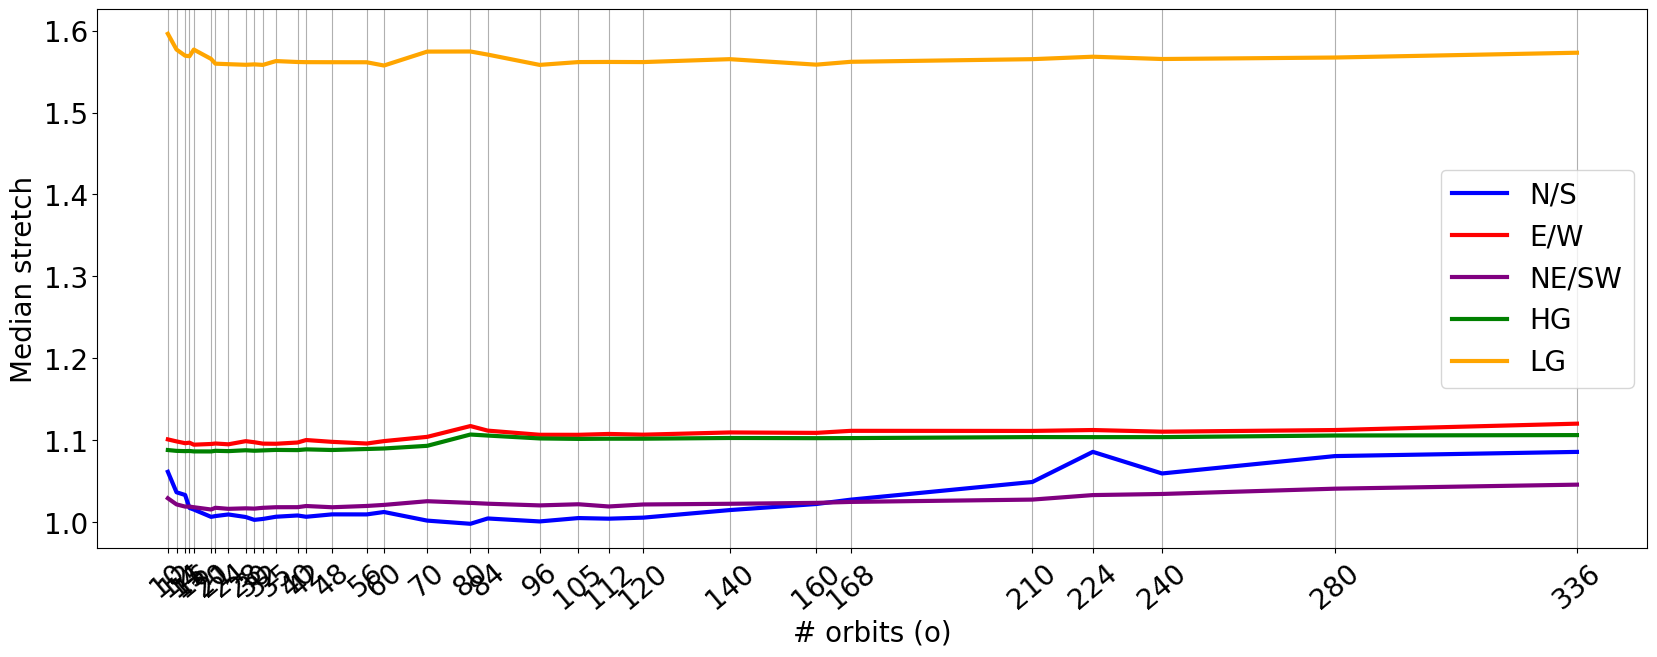

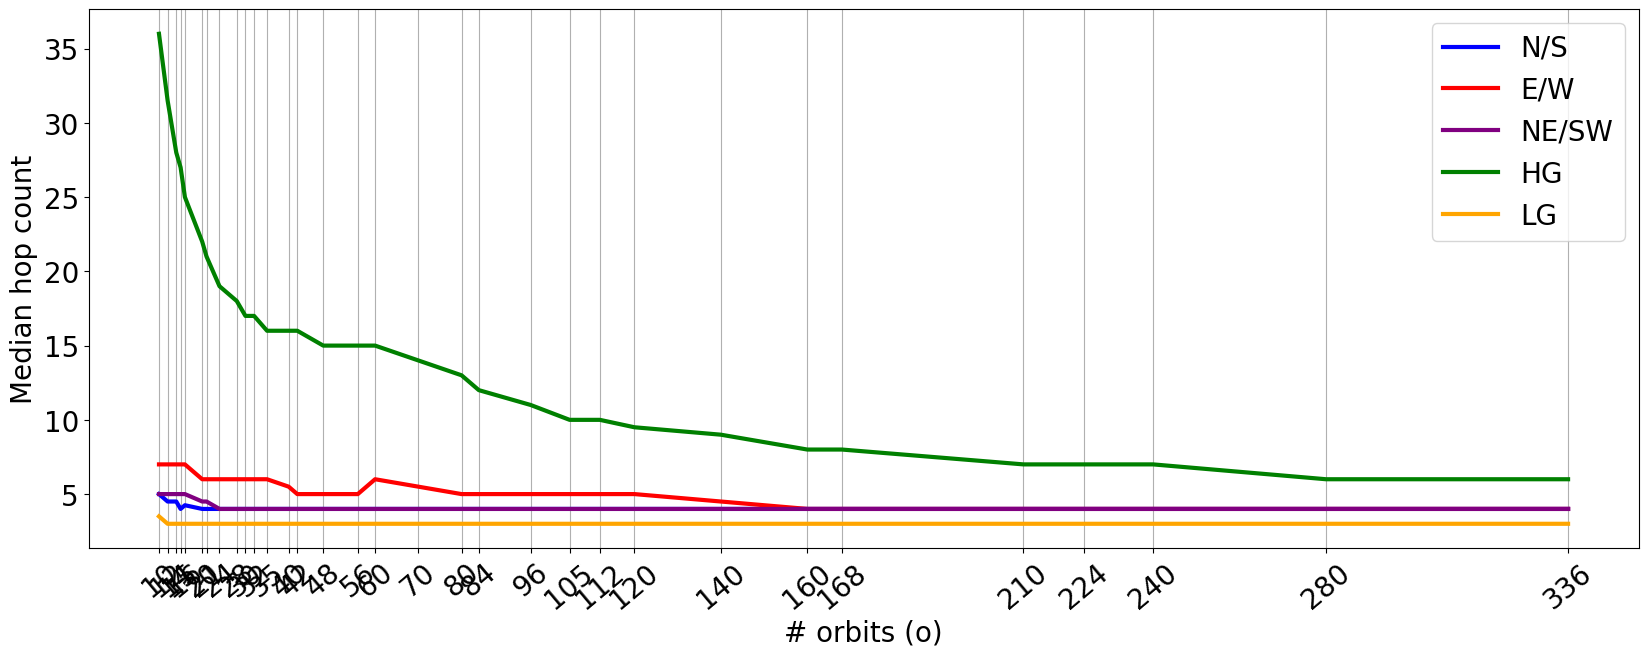

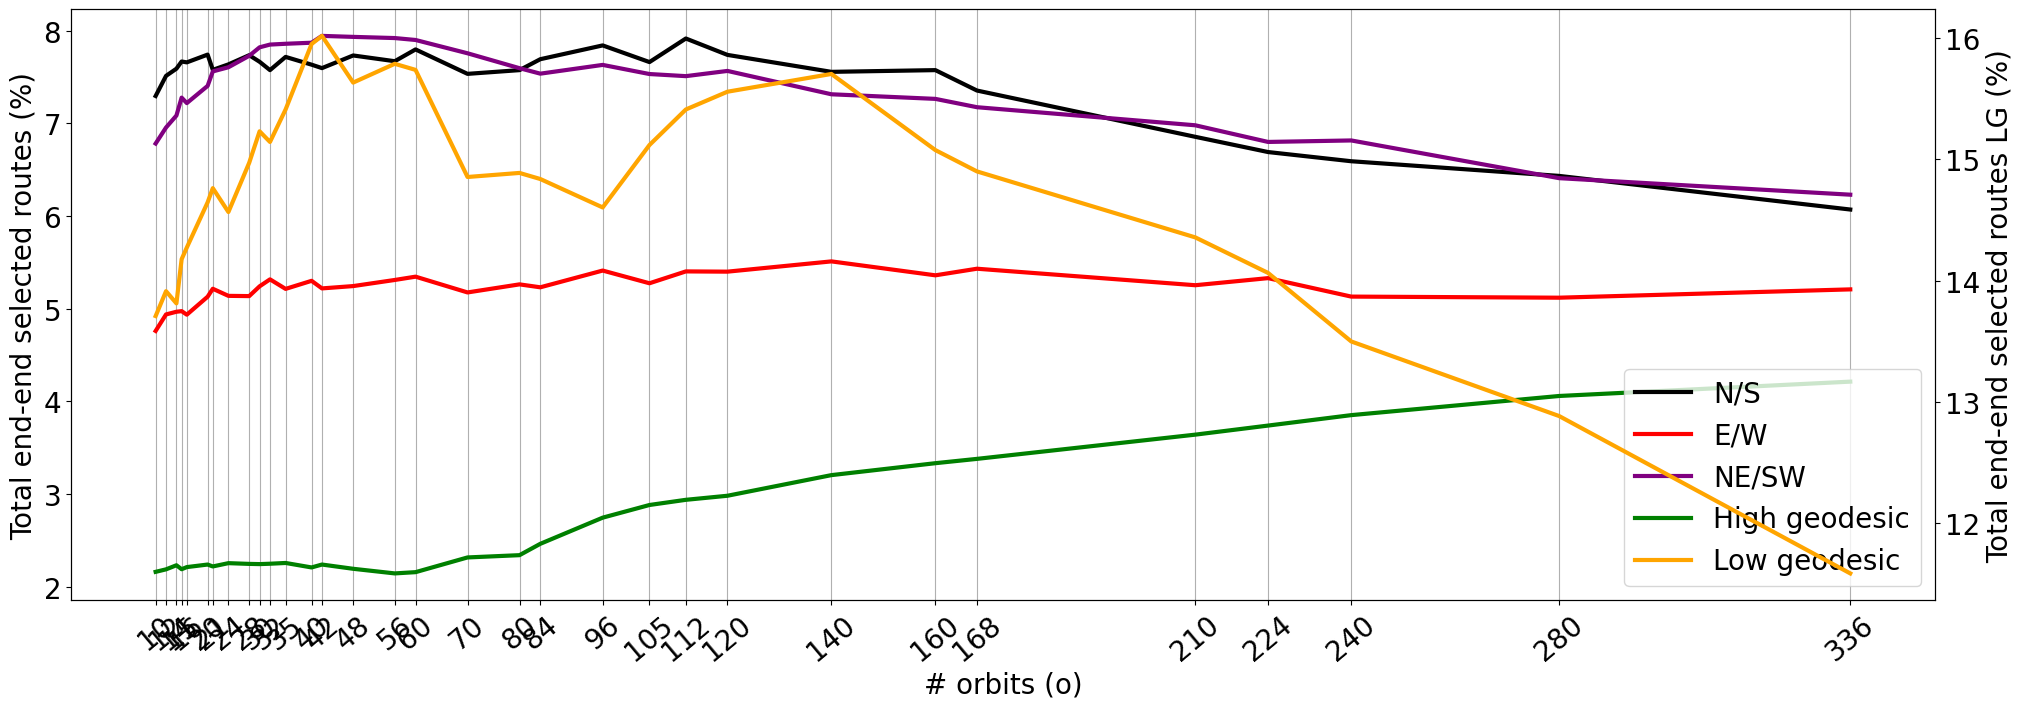

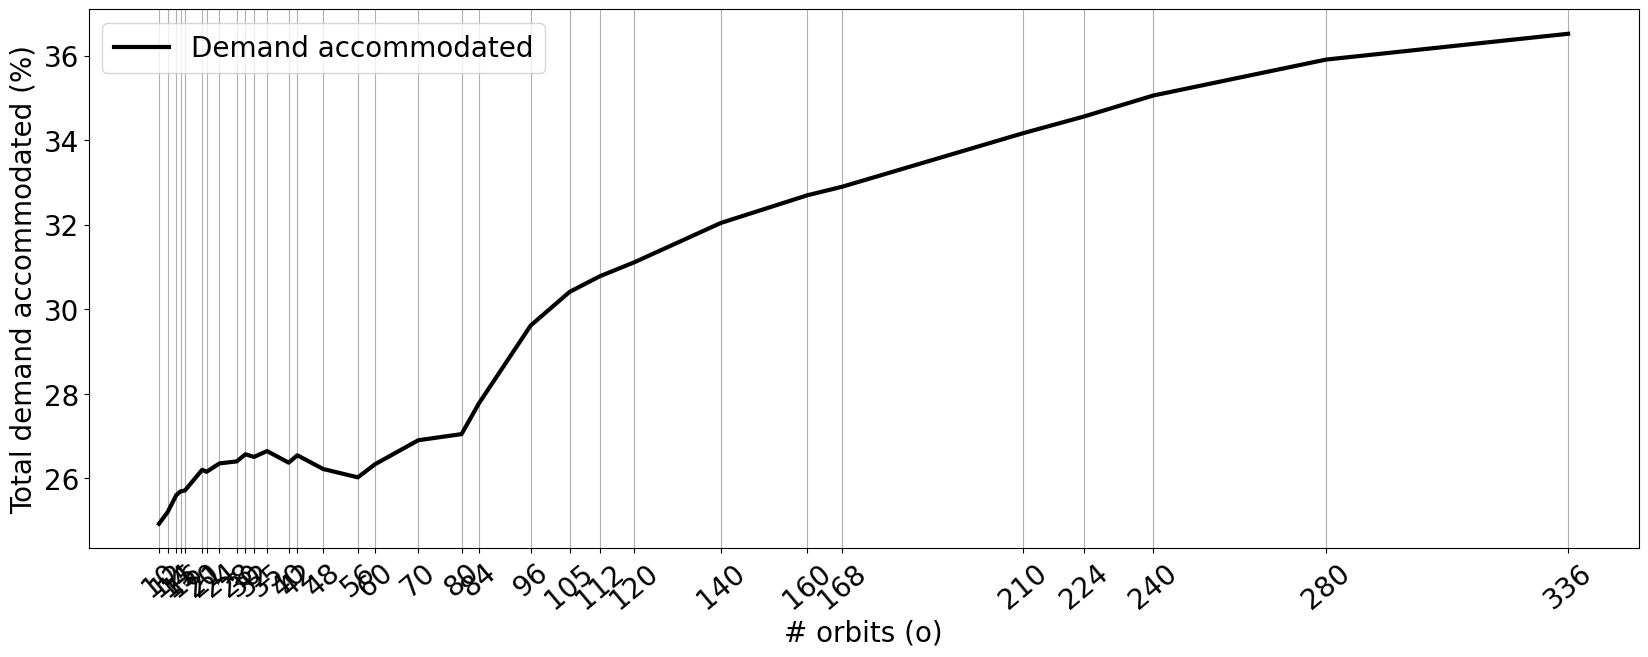

In [9]:
df = pd.read_csv('HP_oxn.csv').sort_values(by='S0_o')
plot_o(df)

#### P vs O

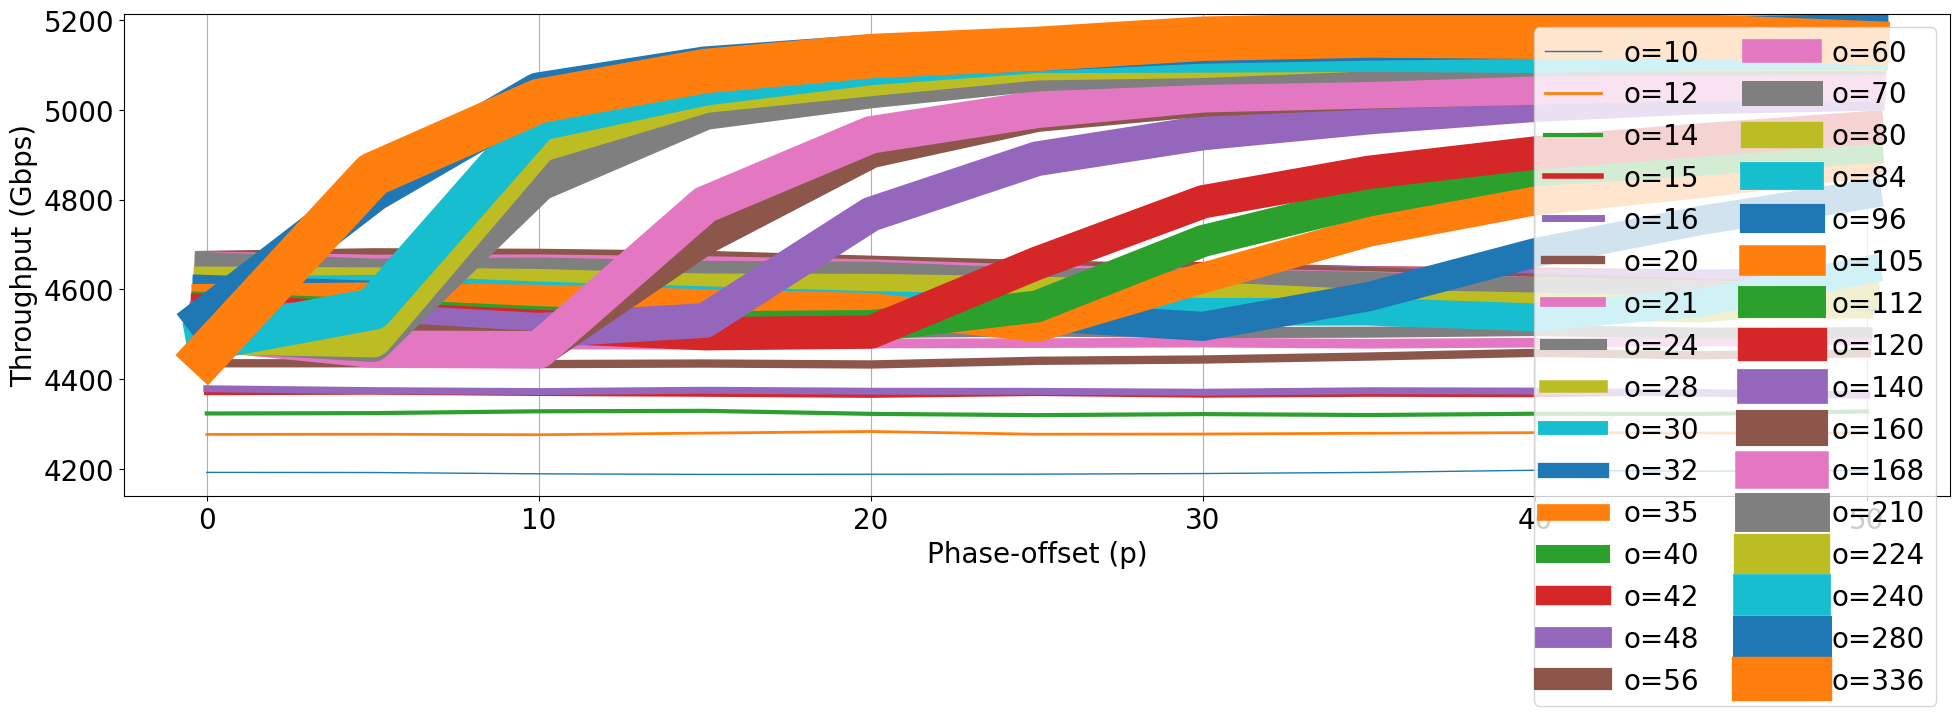

In [10]:
df = pd.read_csv('OXN_VS_P.csv')
plot_o_vs_p(df)